# Imports

In [2]:
using Distributed, Statistics, GraphRecipes, BenchmarkTools, LinearAlgebra, LightGraphs, Plots, RCall

In [3]:
include("../base.jl")
include("../inference.jl")

ergm (generic function with 1 method)

In [30]:
n = 50
g_orig = erdos_renyi(n, 0.05; is_directed = true)
g_adj = convert(Array{Bool, 2}, collect(adjacency_matrix(g_orig)));

## A list of functions which define the model 

In [31]:
funcs = [delta_edge,
delta_mutual,
(g, i, j) -> delta_istar(g,i,j,2),
(g, i, j) -> delta_ostar(g,i,j,2),
delta_m2star,
delta_ttriple,
delta_ctriple,
(g, i, j) -> delta_nodeicov(g,i,j,"cov1"),
(g, i, j) -> delta_nodeocov(g,i,j,"cov1"),
(g, i, j) -> delta_nodediff(g,i,j,2,"cov1")]

10-element Array{Function,1}:
 delta_edge
 delta_mutual
 var"#53#58"()
 var"#54#59"()
 delta_m2star
 delta_ttriple
 delta_ctriple
 var"#55#60"()
 var"#56#61"()
 var"#57#62"()

## Generate "model template"

In [41]:
rand_covariate = randn(n)*0.1
m = erg(g_adj, funcs; realnodecov=Dict("cov1" => rand_covariate))

erg{Array{Bool,2},Function}(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 0 0], Function[delta_edge, delta_mutual, var"#53#58"(), var"#54#59"(), delta_m2star, delta_ttriple, delta_ctriple, var"#55#60"(), var"#56#61"(), var"#57#62"()], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 1 0], Dict("cov1" => [-0.11990512810940135, -0.00046518580759200576, -0.16898510161164662, -0.05164522360136331, 0.0679857543179307, -0.14598019730409087, -0.06231333601925198, 0.03786771929118663, 0.031826050298656115, -0.0013326170261187364  …  0.03645045098773772, -0.037187798653262286, 0.0863799151881628, -0.120874400793682, 0.027928780519359715, 0.08690091773965145, 0.008409960258155142, 0.16606599581585044, -0.042882934459028334, 0.061657331264323004]), nothing, nothing, [1, 2, 3, 3, 1, 0, 2, 4, 5, 3  …  2, 4, 0, 1, 1, 2, 1, 1, 4, 2], [2, 2, 3, 0, 3, 2, 3, 3, 0, 3  …  3, 1, 1, 4, 5, 2, 1, 4, 5, 3], 10, [0.0 0.0 0.0; 1.0 0.0 0.0; … ; 48.0 1128.0 17296.0; 49.0 1176.0 18424.0])

## Generate target parameters

In [42]:
params = vcat(-2., randn(length(funcs)-1)*0.05)

10-element Array{Float64,1}:
 -2.0
 -0.07149335824019183
 -0.01229117620135236
  0.0029160336338537804
 -0.08782715325703455
  0.02688778749910581
  0.0301919167146323
 -0.0023703051377103796
  0.023125485469668607
  0.0698285625879359

## Sample a random graph from the model with these parameters

In [43]:
g = rgraph(params,m,subgraphcount(m),500, return_graph=true)[2].m

50×50 Array{Bool,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  1     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0     1  0  0  0  1  0  0  0  1  0  0  0
 0  0  0  0  0  0  1  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  1  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  1  0  0  0
 0  1  1  1  0  0  0  0  0  0  0  0  0     0  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     

In [44]:
sum(g)

165

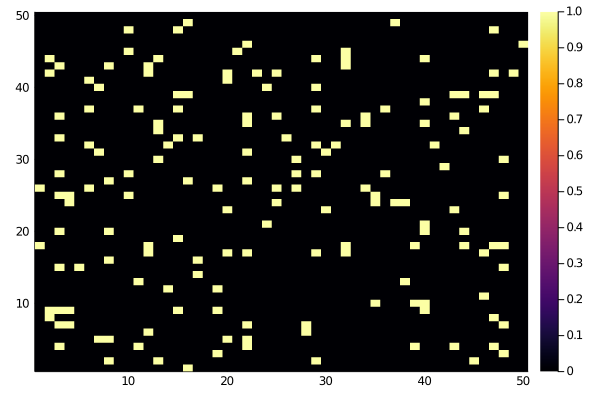

In [45]:
heatmap(g)

In [46]:
g_infer = erg(g, funcs; realnodecov=Dict("cov1" => rand_covariate))

erg{Array{Bool,2},Function}(Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Function[delta_edge, delta_mutual, var"#53#58"(), var"#54#59"(), delta_m2star, delta_ttriple, delta_ctriple, var"#55#60"(), var"#56#61"(), var"#57#62"()], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0], Dict("cov1" => [-0.11990512810940135, -0.00046518580759200576, -0.16898510161164662, -0.05164522360136331, 0.0679857543179307, -0.14598019730409087, -0.06231333601925198, 0.03786771929118663, 0.031826050298656115, -0.0013326170261187364  …  0.03645045098773772, -0.037187798653262286, 0.0863799151881628, -0.120874400793682, 0.027928780519359715, 0.08690091773965145, 0.008409960258155142, 0.16606599581585044, -0.042882934459028334, 0.061657331264323004]), nothing, nothing, [2, 4, 10, 4, 1, 4, 3, 6, 0, 4  …  1, 1, 4, 4, 1, 4, 6, 6, 1, 1], [1, 4, 2, 6, 4, 2, 5, 2, 6, 3  …  2, 7, 4, 5, 3, 2, 0, 3, 2, 0], 10, [0.0 0.0 0.0; 1.0 0.0 0.0; … ; 48.0 1128.0 17296.0; 49.0 1176.0 18424.0])

# MPLE

In [47]:
pl_est = pseudo_likelihood(g_infer)

GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}}:

Coefficients:
───────────────────────────────────────────────────────────────────────
       Estimate  Std. Error    z value  Pr(>|z|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
x1    2.17935     0.342021    6.37199     <1e-9    1.509      2.8497
x2    1.051       0.513125    2.04824     0.0405   0.0452945  2.05671
x3   -0.0656351   0.0385388  -1.70309     0.0886  -0.14117    0.0098995
x4    0.0276839   0.0477391   0.5799      0.5620  -0.065883   0.121251
x5    0.106784    0.0356902   2.99198     0.0028   0.0368329  0.176736
x6   -0.142735    0.104791   -1.36209     0.1732  -0.348121   0.0626515
x7    0.136364    0.236757    0.575964    0.5646  -0.327672   0.600399
x8    1.19408     0.845321    1.41258     0.1578  -0.462717   2.85088
x9    1.80007     0.924176    1.94775     0.0514  -0.01128

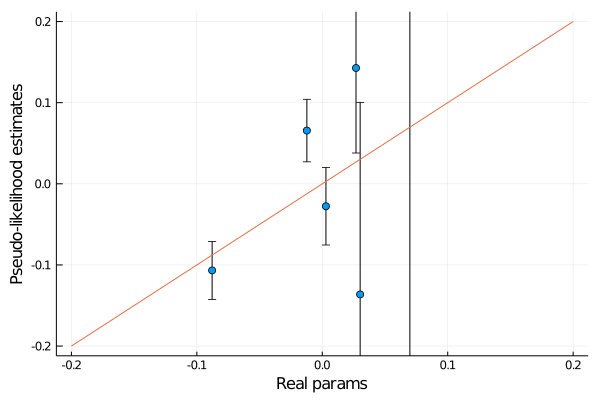

In [49]:
scatter(params,-coef(pl_est),yerror=stderror(pl_est),legend=false, ylabel="Pseudo-likelihood estimates",
    xlabel="Real params",xlim=[-0.2,0.2],ylim=[-0.2,0.2])
plot!([-0.2,0.2],[-0.2,0.2])

# Compare to R's ergm

In [50]:
# Do the model in R/statnet to check to get "correct" values
# Verified that the models get same numbers, even after graph toggling
n1 = deepcopy(g_infer.m)
at1 = copy(g_infer.realnodecov["cov1"])

@rput n1
@rput at1
R"""
library(ergm)
n1a <- as.network(n1)
set.vertex.attribute(n1a, "cov1", at1)
rm1 <- ergm(n1a ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow=2))
rm1a <- summary(n1a ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow=2))
#rm1 <- ergm(n1a ~ edges + mutual + ostar(2) + m2star + absdiff("cov1", pow=2))
#rm1a <- summary(n1a ~ edges + mutual + ostar(2) + m2star + absdiff("cov1", pow=2))
summary(rm1)$coefs$Estimate
summary(rm1)$coefs$"Std. Error"
rm2 <- cbind(summary(rm1)$coefs$Estimate, summary(rm1)$coefs$"Std. Error")
"""

@rget rm2
@rget rm1a

┌ Warning: RCall.jl: Starting maximum pseudolikelihood estimation (MPLE):
│ Evaluating the predictor and response matrix.
│ Maximizing the pseudolikelihood.
│ Finished MPLE.
│ Starting Monte Carlo maximum likelihood estimation (MCMLE):
│ Iteration 1 of at most 20:
│ NOTE: Messages ‘Error in mcexit(0L)...’ may appear; please disregard them.
│ Optimizing with step length 1.
│ The log-likelihood improved by 0.04457.
│ Step length converged once. Increasing MCMC sample size.
│ Iteration 2 of at most 20:
│ Optimizing with step length 1.
│ The log-likelihood improved by 0.008491.
│ Step length converged twice. Stopping.
│ Finished MCMLE.
│ Evaluating log-likelihood at the estimate. Using 20 bridges: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 .
│ This model was fit using MCMC.  To examine model diagnostics and check
│ for degeneracy, use the mcmc.diagnostics() function.
└ @ RCall /Users/adamhaber/.julia/packages/RCall/Qzssx/src/io.jl:160


10-element Array{Float64,1}:
 165.0
   2.0
 317.0
 280.0
 468.0
  44.0
   7.0
  -3.3849890921670656
  -3.6505600548539636
   2.991241775148939

In [51]:
# validate subgraph counts are the same
hcat(rm1a, subgraphcount(g_infer))

10×2 Array{Float64,2}:
 165.0      165.0
   2.0        2.0
 317.0      317.0
 280.0      280.0
 468.0      468.0
  44.0       44.0
   7.0        7.0
  -3.38499   -3.38499
  -3.65056   -3.65056
   2.99124    2.99124

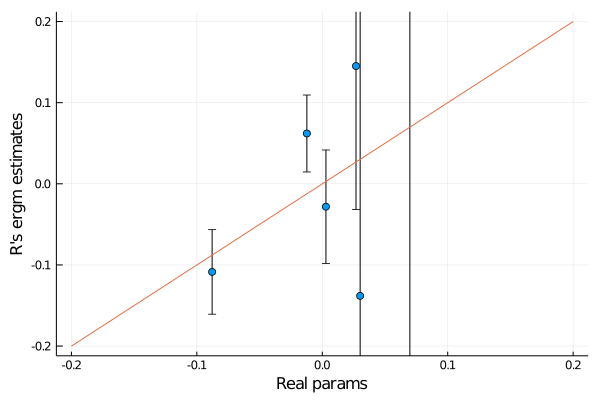

In [52]:
scatter(params,rm2[:,1],yerror=rm2[:,2],legend=false, ylabel="R's ergm estimates",
    xlabel="Real params",ylim=[-0.2,0.2],xlim=[-0.2,0.2])
plot!([-0.2,0.2],[-0.2,0.2])

# Full MCMC

In [53]:
addprocs(4; exeflags="--project")

4-element Array{Int64,1}:
 6
 7
 8
 9

In [54]:
# required for @everywhere to play nicely with envs; 
# see https://discourse.julialang.org/t/understanding-everywhere-and-environments/27438/5
@everywhere push!(LOAD_PATH, "/Users/adamhaber/projects/research/ergmjl")

In [55]:
@everywhere include("../base.jl")
@everywhere include("../inference.jl")

In [56]:
@eval @everywhere g_infer_ev = $g_infer
@eval @everywhere pl_init = coef($pl_est)

In [57]:
@everywhere begin
    init_p = randn(length(pl_init))*0.1
    prop_vec   = diagm(vcat(0.01, fill(0.0001, length(pl_init) - 1)))
    AMH_scaling_factor = 2.38^2 / length(pl_init)
end

In [58]:
rs = pmap(x->ergm(g_infer_ev, init_p, prop_vec, AMH_scaling_factor, 5000, 75, 100, 5), 1:4)

      From worker 2:	Iter: 2  ERGM: [-1.2, 0.09, -0.05, -0.11, -0.09, -0.11, -0.16, 0.05, -0.04, -0.02]
      From worker 5:	Iter: 2  ERGM: [-0.96, 0.15, -0.11, -0.13, -0.11, -0.05, -0.16, 0.11, -0.08, -0.11]
      From worker 3:	Iter: 2  ERGM: [-1.94, 0.04, -0.08, -0.02, -0.02, -0.07, -0.26, 0.09, -0.12, -0.03]
      From worker 4:	Iter: 2  ERGM: [-1.11, 0.15, -0.06, -0.08, -0.11, -0.07, -0.27, 0.09, -0.09, -0.01]
      From worker 2:	Iter: 3  ERGM: [-1.4, -0.03, 0.01, -0.06, -0.19, -0.04, -0.19, 0.03, -0.01, -0.1]
      From worker 3:	Iter: 3  ERGM: [-1.71, -0.06, -0.07, 0.02, -0.09, 0.01, -0.22, 0.11, -0.09, -0.03]
      From worker 5:	Iter: 3  ERGM: [-0.74, 0.14, -0.07, -0.15, -0.14, -0.07, -0.19, 0.09, -0.18, -0.19]
      From worker 4:	Iter: 3  ERGM: [-1.15, 0.1, 0.04, -0.1, -0.23, -0.06, -0.28, 0.1, -0.07, 0.03]
      From worker 2:	Iter: 4  ERGM: [-1.68, -0.02, -0.01, 0.0, -0.13, -0.05, -0.22, 0.12, 0.01, -0.1]
      From worker 3:	Iter: 4  ERGM: [-2.04, 0.04, 0.01, 0.05, -0.09

      From worker 2:	Iter: 22  ERGM: [-1.23, 0.18, 0.1, -0.19, -0.14, -0.09, -0.28, 0.05, -0.11, 0.22]
      From worker 3:	Iter: 22  ERGM: [-1.76, -0.28, 0.04, -0.06, -0.11, -0.05, -0.21, 0.02, 0.06, -0.51]
      From worker 5:	Iter: 22  ERGM: [-1.62, 0.12, 0.1, -0.16, -0.13, -0.06, -0.47, -0.09, -0.37, -0.03]
      From worker 4:	Iter: 22  ERGM: [-2.13, -0.28, 0.07, -0.03, -0.07, -0.12, -0.26, 0.3, -0.14, 0.49]
      From worker 2:	Iter: 23  ERGM: [-0.86, 0.14, 0.03, -0.11, -0.2, -0.15, -0.28, 0.09, -0.09, 0.13]
      From worker 3:	Iter: 23  ERGM: [-1.9, -0.32, 0.06, -0.05, -0.11, 0.0, -0.18, 0.05, 0.16, -0.56]
      From worker 5:	Iter: 23  ERGM: [-1.81, 0.11, 0.13, -0.15, -0.14, -0.09, -0.38, -0.1, -0.36, -0.1]
      From worker 4:	Iter: 23  ERGM: [-1.98, -0.27, 0.08, -0.08, -0.05, -0.12, -0.25, 0.31, -0.14, 0.52]
      From worker 2:	Iter: 24  ERGM: [-0.94, 0.09, 0.05, -0.14, -0.18, -0.05, -0.31, 0.06, -0.15, 0.19]
      From worker 3:	Iter: 24  ERGM: [-1.68, -0.39, 0.01, -0.14, 

      From worker 5:	Iter: 41  ERGM: [-1.49, 0.44, 0.06, -0.13, -0.15, -0.03, -0.4, 0.08, -0.29, -0.41]
      From worker 2:	Iter: 43  ERGM: [-1.93, -0.21, 0.04, -0.08, -0.17, 0.3, -0.3, -0.0, -0.1, -0.04]
      From worker 3:	Iter: 42  ERGM: [-2.47, -0.39, 0.08, 0.05, -0.1, 0.11, 0.07, -0.27, 0.22, -0.57]
      From worker 4:	Iter: 42  ERGM: [-2.27, 0.01, 0.07, 0.03, -0.13, -0.23, -0.09, -0.17, -0.42, 0.47]
      From worker 5:	Iter: 42  ERGM: [-1.92, 0.57, 0.01, -0.02, -0.12, 0.02, -0.34, 0.11, -0.27, -0.36]
      From worker 2:	Iter: 44  ERGM: [-1.25, -0.29, -0.0, -0.12, -0.2, 0.31, -0.37, 0.05, 0.03, -0.04]
      From worker 3:	Iter: 43  ERGM: [-2.29, -0.31, 0.09, 0.04, -0.12, 0.11, 0.08, -0.3, 0.33, -0.53]
      From worker 4:	Iter: 43  ERGM: [-1.53, 0.0, 0.05, -0.06, -0.15, -0.18, -0.04, -0.14, -0.4, 0.44]
      From worker 5:	Iter: 43  ERGM: [-1.9, 0.49, -0.03, -0.02, -0.09, 0.03, -0.41, 0.17, -0.29, -0.37]
      From worker 2:	Iter: 45  ERGM: [-1.37, -0.3, -0.01, -0.1, -0.17, 0

      From worker 5:	Iter: 61  ERGM: [-2.18, 0.52, 0.08, -0.01, -0.14, 0.15, -0.58, 0.44, -0.69, -0.15]
      From worker 2:	Iter: 63  ERGM: [-1.6, -0.18, 0.06, -0.13, -0.11, 0.02, -0.52, -0.09, -0.06, -0.36]
      From worker 3:	Iter: 62  ERGM: [-0.91, -0.32, -0.06, -0.07, -0.21, 0.22, 0.24, -0.22, 0.07, -0.14]
      From worker 4:	Iter: 62  ERGM: [-1.74, -0.34, 0.08, -0.12, -0.14, -0.28, 0.38, 0.06, -0.76, 0.25]
      From worker 5:	Iter: 62  ERGM: [-2.06, 0.54, 0.04, -0.05, -0.1, 0.22, -0.55, 0.4, -0.65, -0.21]
      From worker 2:	Iter: 64  ERGM: [-2.18, -0.23, 0.09, -0.04, -0.09, 0.04, -0.56, -0.05, -0.02, -0.48]
      From worker 3:	Iter: 63  ERGM: [-0.99, -0.44, -0.03, -0.08, -0.22, 0.29, 0.14, -0.19, -0.0, -0.15]
      From worker 4:	Iter: 63  ERGM: [-1.75, -0.31, 0.08, -0.07, -0.12, -0.33, 0.39, 0.08, -0.74, 0.23]
      From worker 5:	Iter: 63  ERGM: [-2.01, 0.42, 0.07, -0.09, -0.12, 0.16, -0.5, 0.37, -0.66, -0.27]
      From worker 2:	Iter: 65  ERGM: [-2.34, -0.28, 0.09, 0.01

      From worker 3:	Iter: 81  ERGM: [-1.41, -0.88, 0.04, -0.2, -0.12, 0.34, -0.14, -0.38, -0.08, -0.05]
      From worker 4:	Iter: 81  ERGM: [-2.06, -0.17, 0.01, 0.07, -0.15, 0.09, 0.22, -0.37, -0.36, -0.25]
      From worker 5:	Iter: 81  ERGM: [-1.44, 0.59, 0.05, -0.14, -0.16, 0.23, -0.26, 0.55, -0.66, -0.31]
      From worker 2:	Iter: 84  ERGM: [-0.79, -0.29, 0.05, -0.27, -0.22, 0.18, -0.52, -0.28, -0.04, -0.71]
      From worker 3:	Iter: 82  ERGM: [-0.97, -0.87, -0.02, -0.21, -0.19, 0.39, -0.11, -0.39, -0.04, -0.17]
      From worker 4:	Iter: 82  ERGM: [-2.23, -0.14, 0.03, 0.02, -0.13, 0.07, 0.26, -0.34, -0.26, -0.13]
      From worker 5:	Iter: 82  ERGM: [-1.36, 0.57, 0.06, -0.19, -0.18, 0.22, -0.29, 0.52, -0.61, -0.29]
      From worker 2:	Iter: 85  ERGM: [-0.88, -0.32, 0.02, -0.25, -0.15, 0.17, -0.5, -0.34, -0.08, -0.63]
      From worker 3:	Iter: 83  ERGM: [-1.4, -0.89, 0.02, -0.15, -0.2, 0.41, -0.07, -0.35, -0.06, -0.26]
      From worker 4:	Iter: 83  ERGM: [-2.01, -0.16, 0.0, 

      From worker 5:	Iter: 100  ERGM: [-2.66, 0.79, 0.06, 0.0, -0.07, 0.12, 0.02, 0.42, -0.61, -0.47]
      From worker 3:	Iter: 101  ERGM: [-1.45, -0.78, 0.06, -0.18, -0.16, 0.17, -0.51, -0.23, -0.63, -0.02]
      From worker 2:	Iter: 104  ERGM: [-2.42, 0.14, 0.11, -0.03, -0.07, 0.06, -0.38, -0.08, -0.26, -0.88]
      From worker 4:	Iter: 101  ERGM: [-1.96, -0.07, 0.06, -0.11, -0.15, 0.28, 0.09, -0.23, -0.45, 0.36]
      From worker 5:	Iter: 101  ERGM: [-1.5, -0.05, -0.01, -0.01, -0.19, 0.14, 0.09, -0.55, -0.23, -0.55]
      From worker 3:	Iter: 102  ERGM: [-1.49, -1.67, 0.05, -0.04, -0.12, -0.05, -0.71, -0.12, -0.55, -0.83]
      From worker 2:	Iter: 105  ERGM: [-1.5, -0.25, -0.02, -0.05, -0.18, 0.13, -0.2, -0.51, -0.29, -0.93]
      From worker 4:	Iter: 102  ERGM: [-2.03, 0.47, 0.06, -0.08, -0.13, 0.3, 0.18, 0.08, -0.88, 0.02]
      From worker 5:	Iter: 102  ERGM: [-2.23, -0.6, 0.07, 0.04, -0.1, -0.06, -0.12, -0.31, 0.07, -0.41]
      From worker 3:	Iter: 103  ERGM: [-2.25, -1.89, 0

      From worker 3:	Iter: 120  ERGM: [-1.88, -0.51, 0.09, -0.11, -0.05, -0.07, -0.69, 1.05, -0.37, 0.63]
      From worker 4:	Iter: 120  ERGM: [-1.89, -0.87, -0.05, 0.0, -0.16, 0.41, 0.09, -0.53, -0.74, -0.72]
      From worker 5:	Iter: 120  ERGM: [-0.9, -1.38, -0.01, -0.2, -0.19, 0.28, -0.02, -1.13, -0.19, 0.61]
      From worker 2:	Iter: 124  ERGM: [-1.18, -0.48, 0.01, -0.08, -0.22, 0.06, 0.12, -0.13, -0.38, -0.25]
      From worker 3:	Iter: 121  ERGM: [-1.14, -0.81, -0.11, -0.09, -0.18, 0.41, -0.29, -0.53, -1.0, 0.57]
      From worker 4:	Iter: 121  ERGM: [-1.68, -0.55, 0.02, -0.1, -0.1, 0.28, -0.69, 0.13, -0.99, 1.04]
      From worker 5:	Iter: 121  ERGM: [-2.71, 0.26, 0.08, -0.01, -0.04, 0.11, -0.02, -0.59, -0.53, -0.08]
      From worker 2:	Iter: 125  ERGM: [-1.72, -0.79, 0.1, -0.24, -0.14, 0.25, 0.37, -0.46, -0.99, -0.66]
      From worker 3:	Iter: 122  ERGM: [-1.83, -0.4, 0.02, -0.05, -0.14, 0.1, -0.34, -0.37, -0.48, 0.42]
      From worker 4:	Iter: 122  ERGM: [-1.93, 0.01, 0.

      From worker 4:	Iter: 139  ERGM: [-2.15, -2.23, 0.05, -0.04, -0.12, 0.21, -0.11, -0.66, -0.06, 0.26]
      From worker 5:	Iter: 139  ERGM: [-1.1, -1.66, -0.03, -0.15, -0.15, -0.04, -0.73, -0.24, -0.06, -0.19]
      From worker 3:	Iter: 140  ERGM: [-0.74, -1.5, -0.06, -0.17, -0.16, 0.34, -0.08, -0.87, -1.83, -0.13]
      From worker 2:	Iter: 144  ERGM: [-1.41, -0.91, -0.0, -0.1, -0.19, 0.09, -0.4, -0.46, -0.23, 0.69]
      From worker 4:	Iter: 140  ERGM: [-1.92, -1.66, 0.07, -0.06, -0.13, 0.09, 0.31, 0.07, -0.95, -0.32]
      From worker 5:	Iter: 140  ERGM: [-1.4, -1.52, -0.01, -0.1, -0.21, 0.54, -0.57, -0.77, -0.64, -1.0]
      From worker 3:	Iter: 141  ERGM: [-2.0, -1.14, 0.07, -0.03, -0.1, 0.01, -0.3, -0.75, -1.93, -1.03]
      From worker 2:	Iter: 145  ERGM: [-1.0, -2.05, -0.01, -0.11, -0.2, 0.27, 0.15, -0.95, -0.36, 0.19]
      From worker 4:	Iter: 141  ERGM: [-1.1, -1.65, 0.04, -0.22, -0.15, 0.28, -0.23, -1.68, 0.39, 0.74]
      From worker 5:	Iter: 141  ERGM: [-1.42, -1.74, 

      From worker 2:	Iter: 163  ERGM: [-2.06, 0.29, 0.05, -0.06, -0.11, 0.21, -0.52, -1.16, -0.6, -0.35]
      From worker 3:	Iter: 159  ERGM: [-1.72, -0.94, 0.05, -0.2, -0.09, 0.38, -0.45, -1.26, -2.03, 0.02]
      From worker 4:	Iter: 159  ERGM: [-1.83, -1.07, 0.05, -0.09, -0.14, 0.21, 0.23, -1.5, -1.69, 0.23]
      From worker 5:	Iter: 159  ERGM: [-1.44, -0.08, -0.02, -0.15, -0.13, 0.44, -1.08, -0.91, -1.29, -0.69]
      From worker 2:	Iter: 164  ERGM: [-2.38, -0.38, 0.05, -0.02, -0.08, 0.23, -0.65, -0.56, -1.93, 0.34]
      From worker 3:	Iter: 160  ERGM: [-1.56, -0.79, -0.0, -0.08, -0.14, 0.25, -0.65, -0.12, -0.69, 0.12]
      From worker 4:	Iter: 160  ERGM: [-1.55, 0.25, 0.01, -0.04, -0.18, 0.02, -0.38, -0.11, -1.15, -0.47]
      From worker 5:	Iter: 160  ERGM: [-1.84, -0.73, 0.06, -0.09, -0.09, 0.09, -0.24, -0.73, -0.9, -0.85]
      From worker 2:	Iter: 165  ERGM: [-1.07, -1.35, -0.02, -0.19, -0.18, 0.35, -0.43, -0.41, -1.24, 1.8]
      From worker 3:	Iter: 161  ERGM: [-1.82, -0

      From worker 4:	Iter: 178  ERGM: [-1.16, -0.8, -0.02, -0.25, -0.14, 0.41, -0.07, -0.96, -2.23, 2.31]
      From worker 5:	Iter: 178  ERGM: [-0.98, -0.22, -0.05, -0.14, -0.24, 0.43, 0.47, -1.6, -1.53, 0.43]
      From worker 2:	Iter: 184  ERGM: [-1.72, -1.12, 0.06, -0.07, -0.17, 0.21, -0.04, -0.7, -0.93, 0.12]
      From worker 3:	Iter: 179  ERGM: [-2.41, -0.62, 0.08, -0.09, -0.04, 0.04, -0.29, 0.08, -1.69, -0.26]
      From worker 4:	Iter: 179  ERGM: [-1.73, -1.05, -0.1, -0.01, -0.14, 0.53, -0.36, 0.76, -1.38, 0.58]
      From worker 5:	Iter: 179  ERGM: [-2.02, -1.36, 0.06, -0.09, -0.13, 0.23, 0.21, -0.51, -0.84, 0.23]
      From worker 2:	Iter: 185  ERGM: [-1.98, -0.37, -0.0, 0.03, -0.13, 0.07, 0.05, -0.42, -0.45, 0.27]
      From worker 3:	Iter: 180  ERGM: [-1.58, -1.53, -0.03, -0.04, -0.17, 0.4, 0.11, 0.68, -0.83, 0.19]
      From worker 4:	Iter: 180  ERGM: [-1.2, -1.21, -0.04, -0.06, -0.17, 0.09, -0.09, -0.22, -1.05, 1.15]
      From worker 5:	Iter: 180  ERGM: [-1.47, -0.9, 0.

      From worker 3:	Iter: 198  ERGM: [-1.96, -0.76, -0.02, 0.01, -0.11, 0.14, -0.15, 0.13, -0.98, -0.42]
      From worker 2:	Iter: 204  ERGM: [-1.48, -0.32, 0.05, -0.15, -0.18, 0.16, 0.24, 0.19, -0.59, 0.74]
      From worker 4:	Iter: 198  ERGM: [-1.73, -0.55, 0.01, -0.11, -0.15, 0.26, 0.0, -0.71, -2.02, -0.03]
      From worker 5:	Iter: 198  ERGM: [-1.67, -0.95, 0.07, -0.08, -0.13, 0.12, -0.63, -0.86, -0.25, -0.02]
      From worker 3:	Iter: 199  ERGM: [-0.19, -0.48, -0.07, -0.19, -0.24, 0.09, 0.1, -0.09, -0.3, -0.52]
      From worker 2:	Iter: 205  ERGM: [-1.5, -0.74, -0.08, 0.01, -0.17, 0.08, -0.02, -0.6, -1.15, -0.17]
      From worker 4:	Iter: 199  ERGM: [-2.24, -0.14, 0.02, 0.0, -0.07, 0.04, 0.02, -0.58, -0.73, -0.75]
      From worker 5:	Iter: 199  ERGM: [-0.76, -1.44, 0.03, -0.2, -0.18, 0.06, -0.8, -1.35, -0.36, -1.38]
      From worker 3:	Iter: 200  ERGM: [-1.71, -0.72, 0.02, -0.02, -0.15, 0.13, 0.01, -0.87, -1.22, -0.21]
      From worker 2:	Iter: 206  ERGM: [-2.74, -1.48, 

      From worker 4:	Iter: 217  ERGM: [-1.93, -0.95, 0.03, -0.02, -0.14, 0.02, 0.25, -1.21, -1.53, -0.18]
      From worker 5:	Iter: 217  ERGM: [-0.92, -0.2, -0.01, -0.23, -0.2, 0.28, 0.27, -1.53, -0.83, 1.12]
      From worker 2:	Iter: 224  ERGM: [-1.65, -0.24, -0.01, -0.1, -0.13, 0.24, -0.63, -0.6, -0.52, -1.41]
      From worker 3:	Iter: 218  ERGM: [-1.83, -1.27, 0.07, -0.17, -0.12, 0.23, 0.18, -0.92, -0.28, -0.51]
      From worker 4:	Iter: 218  ERGM: [-2.32, -0.69, 0.03, 0.0, -0.05, 0.04, -0.23, -1.11, -0.63, -0.18]
      From worker 5:	Iter: 218  ERGM: [-0.71, -0.06, -0.17, -0.13, -0.24, 0.2, 0.38, -2.95, -1.41, -0.72]
      From worker 2:	Iter: 225  ERGM: [-2.04, -0.86, 0.05, -0.1, -0.06, 0.24, -0.3, -0.57, -1.16, -0.95]
      From worker 3:	Iter: 219  ERGM: [-1.9, -0.28, 0.03, 0.01, -0.18, 0.3, 0.48, -1.35, -0.89, -1.37]
      From worker 4:	Iter: 219  ERGM: [-1.49, -0.62, 0.02, -0.07, -0.13, 0.0, -0.1, -1.2, -0.34, 0.44]
      From worker 5:	Iter: 219  ERGM: [-1.99, -1.16, 0.0

      From worker 5:	Iter: 236  ERGM: [-1.39, -0.18, 0.04, -0.1, -0.17, 0.13, -0.54, -0.83, -0.41, -1.43]
      From worker 3:	Iter: 237  ERGM: [-1.02, -0.51, -0.08, -0.19, -0.19, 0.52, 0.32, -0.03, -1.88, -0.55]
      From worker 2:	Iter: 244  ERGM: [-1.16, -0.44, -0.03, -0.12, -0.19, 0.15, -0.2, -0.63, -0.9, 0.53]
      From worker 4:	Iter: 237  ERGM: [-1.79, -0.09, 0.03, -0.01, -0.2, 0.17, 0.31, -0.79, -1.2, -1.69]
      From worker 5:	Iter: 237  ERGM: [-0.94, -0.43, 0.02, -0.25, -0.19, 0.35, -0.84, -0.97, -0.05, 0.68]
      From worker 3:	Iter: 238  ERGM: [-1.06, -1.56, 0.04, -0.18, -0.23, 0.38, -0.0, -0.37, -1.82, -1.08]
      From worker 2:	Iter: 245  ERGM: [-0.95, -0.09, 0.02, -0.29, -0.16, 0.42, -0.74, -0.5, -1.25, -0.85]
      From worker 4:	Iter: 238  ERGM: [-2.21, -1.78, 0.09, -0.06, -0.14, 0.11, -0.43, -0.49, -1.09, -0.53]
      From worker 5:	Iter: 238  ERGM: [-1.65, -1.63, -0.02, -0.02, -0.16, 0.27, -0.23, -1.52, -0.53, 0.11]
      From worker 3:	Iter: 239  ERGM: [-1.37, 

      From worker 3:	Iter: 256  ERGM: [-2.43, -0.57, 0.09, -0.02, -0.06, -0.08, -0.27, -0.42, -0.64, 0.86]
      From worker 4:	Iter: 256  ERGM: [-1.47, -0.35, 0.01, -0.06, -0.17, 0.04, -0.07, -0.82, -0.9, 0.1]
      From worker 5:	Iter: 256  ERGM: [-1.46, -0.45, -0.02, -0.07, -0.13, 0.02, 0.06, -0.8, -0.41, -0.8]
      From worker 2:	Iter: 264  ERGM: [-1.79, -1.08, 0.06, -0.05, -0.15, 0.03, 0.45, -0.67, -0.95, 0.46]
      From worker 3:	Iter: 257  ERGM: [-2.26, -0.33, 0.06, 0.01, -0.11, 0.04, -0.48, -1.57, -0.37, -0.12]
      From worker 4:	Iter: 257  ERGM: [-0.38, -1.59, 0.05, -0.28, -0.21, 0.07, -0.33, -0.54, -0.83, -0.87]
      From worker 5:	Iter: 257  ERGM: [-0.73, -0.34, -0.03, -0.29, -0.2, 0.27, -0.0, -1.15, -2.42, -2.32]
      From worker 2:	Iter: 265  ERGM: [-1.3, -0.54, 0.02, -0.1, -0.21, 0.26, 0.22, -0.24, -0.88, -0.37]
      From worker 3:	Iter: 258  ERGM: [-1.68, -0.25, 0.01, -0.12, -0.12, 0.31, -1.07, -1.23, -0.22, -1.08]
      From worker 4:	Iter: 258  ERGM: [-0.89, -0.

      From worker 4:	Iter: 275  ERGM: [-1.69, -0.93, 0.03, -0.14, -0.17, 0.24, 0.16, -1.68, -1.15, 0.62]
      From worker 5:	Iter: 275  ERGM: [-1.87, -0.75, -0.01, 0.01, -0.12, 0.1, -0.34, -1.06, -1.09, 0.09]
      From worker 3:	Iter: 276  ERGM: [-1.81, -1.86, 0.06, -0.04, -0.13, 0.07, 0.02, -0.78, -0.51, -0.86]
      From worker 2:	Iter: 284  ERGM: [-1.5, -1.75, 0.07, -0.18, -0.15, 0.18, 0.14, -1.04, -1.97, 0.46]
      From worker 4:	Iter: 276  ERGM: [-1.84, -1.8, 0.03, -0.05, -0.16, 0.3, 0.04, -0.14, -1.11, -0.32]
      From worker 5:	Iter: 276  ERGM: [-1.25, -0.08, 0.04, -0.08, -0.19, 0.07, -0.45, -1.13, -0.83, 0.83]
      From worker 3:	Iter: 277  ERGM: [-1.45, -1.29, -0.1, -0.08, -0.12, 0.38, -0.33, 0.2, -0.63, -1.55]
      From worker 2:	Iter: 285  ERGM: [-2.89, -1.11, 0.1, -0.02, -0.06, 0.26, 0.28, -0.98, -2.6, -0.04]
      From worker 4:	Iter: 277  ERGM: [-1.63, -1.13, -0.01, -0.02, -0.18, 0.28, 0.29, 0.59, 0.86, 1.44]
      From worker 5:	Iter: 277  ERGM: [-1.74, -0.28, 0.06

      From worker 2:	Iter: 303  ERGM: [-1.39, -0.21, 0.06, -0.16, -0.17, 0.2, -0.09, -0.92, -0.23, 0.98]
      From worker 3:	Iter: 295  ERGM: [-0.76, -1.25, -0.08, -0.2, -0.25, 0.3, 1.09, 1.13, -0.83, -0.52]
      From worker 4:	Iter: 295  ERGM: [-2.45, 0.05, 0.07, -0.02, -0.09, -0.0, 0.24, -1.08, -1.06, 2.28]
      From worker 5:	Iter: 295  ERGM: [-1.33, -0.81, -0.07, -0.08, -0.15, 0.27, -0.28, -0.93, -0.7, 0.37]
      From worker 2:	Iter: 304  ERGM: [-1.3, -2.68, 0.07, -0.01, -0.14, -0.13, -0.22, -2.92, -1.23, 2.04]
      From worker 3:	Iter: 296  ERGM: [-1.27, -0.71, -0.07, -0.08, -0.23, 0.4, 0.28, 0.58, 0.44, -0.73]
      From worker 4:	Iter: 296  ERGM: [-1.95, -0.94, 0.0, -0.04, -0.09, 0.1, -0.12, -0.35, -1.0, 0.39]
      From worker 5:	Iter: 296  ERGM: [-2.45, -0.66, 0.06, -0.03, -0.04, 0.16, -1.3, -0.83, -1.54, 0.5]
      From worker 2:	Iter: 305  ERGM: [-1.52, -1.32, -0.02, 0.03, -0.14, -0.17, -0.82, -1.47, -1.15, -0.84]
      From worker 3:	Iter: 297  ERGM: [-1.86, -0.65, 0.0

      From worker 2:	Iter: 323  ERGM: [-1.8, -0.5, -0.03, 0.04, -0.15, 0.01, -0.1, -1.05, -0.88, 1.43]
      From worker 4:	Iter: 314  ERGM: [-1.7, -0.75, 0.02, -0.01, -0.17, 0.16, -0.22, -1.35, -0.85, -0.14]
      From worker 5:	Iter: 314  ERGM: [-1.71, -0.41, 0.03, -0.07, -0.17, 0.24, -0.66, -0.86, -1.6, -0.59]
      From worker 3:	Iter: 315  ERGM: [-2.22, 0.01, 0.05, -0.0, -0.12, 0.06, 0.24, -1.09, -1.94, -0.78]
      From worker 2:	Iter: 324  ERGM: [-1.47, -0.78, 0.05, -0.05, -0.15, 0.07, -1.4, 0.32, -0.93, 0.46]
      From worker 4:	Iter: 315  ERGM: [-2.23, -0.41, 0.1, -0.09, -0.1, 0.23, -0.4, -1.19, -1.25, -1.12]
      From worker 5:	Iter: 315  ERGM: [-1.84, -0.74, 0.02, 0.04, -0.2, 0.26, 0.45, -0.37, -0.46, -0.35]
      From worker 3:	Iter: 316  ERGM: [-2.25, 0.2, 0.1, -0.02, -0.14, 0.07, -0.33, -1.18, -1.59, -1.18]
      From worker 2:	Iter: 325  ERGM: [-2.03, -0.39, 0.06, 0.0, -0.11, -0.0, -1.0, -0.57, -0.77, 0.56]
      From worker 4:	Iter: 316  ERGM: [-2.04, -0.42, 0.05, 0.0

      From worker 5:	Iter: 333  ERGM: [-1.22, -0.92, 0.07, -0.25, -0.12, 0.11, -0.27, -0.05, -1.83, -0.63]
      From worker 2:	Iter: 343  ERGM: [-0.5, -1.1, -0.13, -0.15, -0.27, 0.48, 0.37, -1.25, -0.51, 2.11]
      From worker 3:	Iter: 334  ERGM: [-0.83, -1.65, -0.08, -0.18, -0.19, 0.53, -0.49, -1.55, -0.9, -0.89]
      From worker 4:	Iter: 334  ERGM: [-1.6, -0.66, 0.04, -0.08, -0.14, -0.1, -0.16, -0.12, -0.94, -0.04]
      From worker 2:	Iter: 344  ERGM: [-1.08, -1.19, -0.01, -0.14, -0.16, 0.13, -0.25, 0.0, -0.96, 1.09]
      From worker 5:	Iter: 334  ERGM: [-1.88, -1.26, 0.05, -0.13, -0.11, 0.24, -0.14, -0.36, -1.63, -0.07]
      From worker 3:	Iter: 335  ERGM: [-1.43, -1.0, -0.02, -0.21, -0.09, 0.34, 0.0, 0.13, -0.67, 0.61]
      From worker 4:	Iter: 335  ERGM: [-1.62, -1.05, 0.06, -0.11, -0.19, 0.19, 0.39, -1.62, -0.59, -0.41]
      From worker 2:	Iter: 345  ERGM: [-2.0, -1.0, 0.06, -0.04, -0.14, 0.19, -0.15, 0.87, -1.46, 0.82]
      From worker 5:	Iter: 335  ERGM: [-1.9, -0.44, 

      From worker 3:	Iter: 353  ERGM: [-1.21, -1.08, 0.04, -0.19, -0.22, 0.34, 0.19, -1.17, -1.01, -0.58]
      From worker 2:	Iter: 363  ERGM: [-2.07, -1.73, 0.04, -0.03, -0.14, 0.08, 0.4, -1.02, -0.8, -1.49]
      From worker 4:	Iter: 353  ERGM: [-1.54, -1.53, -0.04, -0.06, -0.14, 0.22, -0.41, -1.82, -1.07, 1.62]
      From worker 5:	Iter: 353  ERGM: [-2.42, 0.41, 0.1, 0.05, -0.12, -0.17, -0.43, -0.19, -0.4, -1.05]
      From worker 3:	Iter: 354  ERGM: [-1.24, -1.02, 0.04, -0.14, -0.13, -0.05, -0.39, -1.43, -1.43, 0.99]
      From worker 2:	Iter: 364  ERGM: [-1.11, -0.9, -0.01, -0.18, -0.19, 0.2, 0.01, -1.36, -0.23, -1.65]
      From worker 4:	Iter: 354  ERGM: [-1.57, -0.73, -0.02, -0.03, -0.12, 0.17, -0.11, -0.4, -1.09, -0.96]
      From worker 5:	Iter: 354  ERGM: [-2.34, 0.02, 0.06, 0.02, -0.14, 0.05, 0.24, -0.11, -1.51, 0.37]
      From worker 3:	Iter: 355  ERGM: [-0.91, -0.55, 0.05, -0.2, -0.22, 0.24, -0.21, -0.06, 0.07, -0.5]
      From worker 2:	Iter: 365  ERGM: [-2.02, -1.47, 

      From worker 4:	Iter: 372  ERGM: [-1.11, -0.66, -0.06, -0.13, -0.15, 0.24, -0.22, -0.26, 0.6, -0.46]
      From worker 2:	Iter: 383  ERGM: [-1.81, 0.35, 0.01, -0.09, -0.09, 0.14, -0.33, -0.3, -0.63, -0.28]
      From worker 5:	Iter: 372  ERGM: [-2.14, 0.04, 0.06, -0.05, -0.15, 0.32, -0.69, -0.56, -0.43, 1.07]
      From worker 3:	Iter: 373  ERGM: [-2.49, -1.29, 0.01, 0.09, -0.09, 0.16, -0.25, -0.0, -0.76, 0.09]
      From worker 4:	Iter: 373  ERGM: [-1.33, -1.02, -0.06, -0.1, -0.21, 0.37, 0.36, -2.24, -1.65, -1.6]
      From worker 2:	Iter: 384  ERGM: [-1.56, -1.4, -0.03, -0.06, -0.19, 0.49, 0.2, -0.49, -0.63, 0.61]
      From worker 5:	Iter: 373  ERGM: [-1.22, -0.98, 0.01, -0.18, -0.14, 0.3, -0.6, -1.22, -1.1, 0.62]
      From worker 3:	Iter: 374  ERGM: [-1.46, -0.44, 0.01, -0.1, -0.19, 0.38, -0.41, -1.2, -1.54, -0.64]
      From worker 2:	Iter: 385  ERGM: [-1.21, -1.27, -0.01, -0.13, -0.16, 0.31, 0.05, -0.95, -0.63, 0.03]
      From worker 4:	Iter: 374  ERGM: [-0.57, -0.79, -0.0

      From worker 5:	Iter: 391  ERGM: [-1.48, -1.86, -0.04, -0.1, -0.15, 0.22, -0.26, -1.83, -1.36, 0.42]
      From worker 3:	Iter: 392  ERGM: [-1.57, -0.29, 0.03, -0.06, -0.17, -0.12, -0.1, -0.7, -1.49, -0.42]
      From worker 2:	Iter: 403  ERGM: [-2.17, -0.68, 0.07, -0.01, -0.11, -0.02, 0.37, 0.45, -1.29, -0.45]
      From worker 4:	Iter: 392  ERGM: [-2.17, -0.62, -0.0, 0.04, -0.09, 0.13, -0.35, 0.41, -2.05, -1.63]
      From worker 5:	Iter: 392  ERGM: [-1.57, -1.2, 0.07, -0.19, -0.11, 0.11, 0.38, -0.79, 0.51, -0.82]
      From worker 3:	Iter: 393  ERGM: [-1.9, -1.32, 0.02, -0.06, -0.13, 0.07, -0.73, -1.38, -1.51, -0.29]
      From worker 2:	Iter: 404  ERGM: [-2.49, -1.01, 0.04, -0.03, -0.1, 0.29, 0.3, -1.56, -1.59, 0.09]
      From worker 4:	Iter: 393  ERGM: [-1.6, -0.8, 0.0, -0.05, -0.15, 0.17, 0.36, -1.3, -1.53, -0.61]
      From worker 5:	Iter: 393  ERGM: [-1.25, -1.71, 0.05, -0.15, -0.23, 0.35, -0.11, -0.97, -0.87, -0.92]
      From worker 3:	Iter: 394  ERGM: [-1.0, -1.93, -0.

      From worker 3:	Iter: 411  ERGM: [-0.71, -0.58, 0.04, -0.24, -0.25, 0.22, -0.3, -0.45, -0.87, -0.81]
      From worker 2:	Iter: 423  ERGM: [-1.36, -1.16, 0.02, -0.06, -0.16, 0.02, -0.22, -1.53, -0.67, -0.42]
      From worker 4:	Iter: 411  ERGM: [-2.27, -0.57, 0.07, -0.05, -0.03, -0.02, -0.67, -2.21, 0.09, -2.12]
      From worker 5:	Iter: 411  ERGM: [-1.48, -1.3, 0.04, -0.0, -0.18, -0.18, -0.26, -1.56, -1.4, 0.56]
      From worker 3:	Iter: 412  ERGM: [-1.04, -0.96, 0.01, -0.24, -0.16, 0.41, -0.45, -1.23, -1.62, 0.46]
      From worker 2:	Iter: 424  ERGM: [-2.5, -0.22, 0.13, -0.04, -0.07, -0.16, -0.04, -1.53, -1.17, -0.41]
      From worker 4:	Iter: 412  ERGM: [-0.65, -1.36, -0.09, -0.13, -0.22, 0.2, -0.27, -1.43, -1.17, 0.43]
      From worker 5:	Iter: 412  ERGM: [-0.84, -0.83, 0.02, -0.05, -0.26, -0.27, 0.62, 0.05, -0.38, 0.32]
      From worker 3:	Iter: 413  ERGM: [-1.21, -0.39, 0.04, -0.08, -0.24, 0.21, 0.2, 0.1, -0.46, 0.2]
      From worker 2:	Iter: 425  ERGM: [-1.94, -0.86

      From worker 4:	Iter: 430  ERGM: [-1.54, -1.66, 0.04, -0.06, -0.18, -0.02, -0.09, -0.01, -0.62, -1.07]
      From worker 5:	Iter: 430  ERGM: [-1.24, -0.14, 0.02, -0.11, -0.19, 0.24, -0.35, -1.22, -2.07, -0.52]
      From worker 2:	Iter: 443  ERGM: [-1.62, -0.38, 0.03, -0.14, -0.14, 0.45, -0.25, -0.83, -1.31, 0.72]
      From worker 3:	Iter: 431  ERGM: [-1.61, -0.89, 0.02, -0.11, -0.16, 0.3, 0.17, -0.55, -0.39, 0.4]
      From worker 4:	Iter: 431  ERGM: [-2.2, -1.73, 0.05, -0.01, -0.14, 0.38, -0.11, -1.09, -0.11, -1.36]
      From worker 2:	Iter: 444  ERGM: [-1.27, -0.39, 0.04, -0.13, -0.14, 0.07, -0.09, -0.13, 0.13, 1.13]
      From worker 5:	Iter: 431  ERGM: [-2.12, -1.64, 0.08, -0.04, -0.08, -0.01, -0.56, -0.1, -0.81, -0.09]
      From worker 3:	Iter: 432  ERGM: [-1.1, -1.78, 0.01, -0.09, -0.22, 0.13, 0.33, -1.05, -0.84, 0.45]
      From worker 4:	Iter: 432  ERGM: [-2.41, -1.3, 0.1, 0.02, -0.1, 0.16, -0.55, -0.04, 0.42, 0.32]
      From worker 2:	Iter: 445  ERGM: [-1.92, -0.42, 

      From worker 5:	Iter: 449  ERGM: [-1.96, -0.44, -0.02, -0.09, -0.12, 0.39, 0.11, -1.12, -0.95, 0.82]
      From worker 3:	Iter: 450  ERGM: [-1.74, -0.29, 0.01, -0.03, -0.14, 0.16, -0.08, -1.13, 0.16, -1.26]
      From worker 2:	Iter: 463  ERGM: [-1.97, -1.46, 0.09, -0.02, -0.13, -0.09, 0.19, -0.65, -0.31, 1.6]
      From worker 4:	Iter: 450  ERGM: [-1.23, -1.4, 0.0, -0.14, -0.19, 0.12, 0.35, -0.97, -0.91, -1.57]
      From worker 5:	Iter: 450  ERGM: [-1.78, -0.94, 0.09, -0.06, -0.18, 0.13, 0.1, -0.71, -1.37, -1.32]
      From worker 3:	Iter: 451  ERGM: [-1.45, -1.87, -0.03, -0.01, -0.15, -0.03, -0.13, -0.43, -0.32, 0.03]
      From worker 2:	Iter: 464  ERGM: [-2.41, -0.47, -0.02, 0.09, -0.14, 0.15, 0.31, 0.04, -0.56, 0.64]
      From worker 4:	Iter: 451  ERGM: [-0.69, -1.07, -0.03, -0.18, -0.22, 0.02, -0.03, -1.07, -0.62, -1.21]
      From worker 5:	Iter: 451  ERGM: [-1.1, -1.91, 0.03, -0.16, -0.21, 0.21, 0.05, -0.17, -0.55, -1.66]
      From worker 3:	Iter: 452  ERGM: [-1.73, -0.

      From worker 3:	Iter: 469  ERGM: [-1.65, -0.96, -0.02, 0.0, -0.15, 0.06, 0.13, -1.58, -2.8, 0.2]
      From worker 4:	Iter: 469  ERGM: [-1.43, -1.71, 0.04, -0.12, -0.16, 0.12, 0.1, -0.56, -0.73, -1.21]
      From worker 2:	Iter: 483  ERGM: [-1.73, -1.11, 0.08, -0.16, -0.14, 0.07, 0.22, -0.38, -1.85, 0.64]
      From worker 5:	Iter: 469  ERGM: [-1.79, -0.98, 0.08, -0.09, -0.14, 0.1, 0.14, -1.26, -1.13, 1.1]
      From worker 3:	Iter: 470  ERGM: [-1.2, -1.26, 0.03, -0.2, -0.23, 0.42, -0.35, -1.27, -1.27, -2.11]
      From worker 4:	Iter: 470  ERGM: [-1.79, -0.87, -0.01, -0.1, -0.12, 0.35, 0.08, -1.2, -1.87, 0.27]
      From worker 2:	Iter: 484  ERGM: [-1.6, -1.86, -0.03, -0.09, -0.14, 0.33, -0.42, -1.29, -0.87, -0.24]
      From worker 5:	Iter: 470  ERGM: [-2.36, -1.46, 0.1, -0.02, -0.09, -0.06, -0.82, -0.46, -1.44, -1.04]
      From worker 3:	Iter: 471  ERGM: [-0.86, -1.02, -0.06, -0.16, -0.27, 0.39, 0.76, -0.93, -1.5, -1.0]
      From worker 4:	Iter: 471  ERGM: [-1.47, -0.5, 0.0, 

      From worker 4:	Iter: 488  ERGM: [-1.74, -0.56, 0.06, -0.15, -0.1, 0.29, -0.31, 0.33, -0.38, -1.07]
      From worker 5:	Iter: 488  ERGM: [-1.35, -0.61, 0.08, -0.13, -0.19, 0.13, 0.18, -0.28, -0.92, -1.4]
      From worker 3:	Iter: 489  ERGM: [-2.46, -0.13, 0.11, -0.0, -0.1, -0.14, 0.54, -0.42, -1.34, 0.04]
      From worker 2:	Iter: 503  ERGM: [-1.41, -0.86, 0.01, -0.11, -0.11, 0.04, -0.73, -0.0, -0.69, -1.43]
      From worker 4:	Iter: 489  ERGM: [-2.67, 0.44, 0.11, 0.06, -0.09, -0.08, 0.01, -0.82, -0.99, 0.84]
      From worker 5:	Iter: 489  ERGM: [-1.64, -0.94, 0.05, -0.1, -0.23, 0.32, 0.47, -1.21, -1.08, 1.82]
      From worker 3:	Iter: 490  ERGM: [-1.21, -1.22, 0.04, -0.06, -0.21, -0.01, 0.06, -0.86, -1.45, -2.43]
      From worker 2:	Iter: 504  ERGM: [-2.01, -1.51, 0.04, -0.06, -0.13, 0.29, 0.16, -0.03, -0.9, 1.16]
      From worker 4:	Iter: 490  ERGM: [-2.09, 0.23, 0.08, -0.05, -0.2, 0.14, 0.48, -0.54, -0.54, 1.22]
      From worker 5:	Iter: 490  ERGM: [-1.32, -1.09, 0.01,

      From worker 5:	Iter: 507  ERGM: [-1.21, -1.43, -0.02, -0.05, -0.18, -0.1, 0.09, -2.12, -0.56, 0.14]
      From worker 3:	Iter: 508  ERGM: [-1.54, -1.06, -0.01, -0.05, -0.17, 0.24, -0.36, -0.79, -1.38, -0.6]
      From worker 4:	Iter: 508  ERGM: [-1.69, -0.13, 0.06, -0.09, -0.21, 0.27, 0.62, -0.5, -0.56, 0.58]
      From worker 2:	Iter: 523  ERGM: [-1.58, -1.4, 0.01, 0.03, -0.19, -0.1, 0.2, -1.56, -0.96, 1.23]
      From worker 5:	Iter: 508  ERGM: [-1.26, -0.9, -0.02, -0.09, -0.2, 0.35, 0.33, -0.03, -0.04, -0.17]
      From worker 3:	Iter: 509  ERGM: [-2.61, -1.42, 0.06, -0.01, -0.03, 0.1, -0.32, -0.98, -1.67, -0.19]
      From worker 4:	Iter: 509  ERGM: [-2.3, -1.57, 0.04, -0.07, -0.05, 0.22, -0.39, 0.67, -1.22, 1.15]
      From worker 2:	Iter: 524  ERGM: [-1.55, -1.56, 0.02, -0.05, -0.17, -0.05, -0.25, -0.41, -0.24, 0.59]
      From worker 5:	Iter: 509  ERGM: [-2.48, -1.06, 0.09, -0.05, -0.09, 0.19, 0.04, -0.39, -0.54, 0.77]
      From worker 3:	Iter: 510  ERGM: [-2.81, -1.22, 0

      From worker 2:	Iter: 542  ERGM: [-1.91, -1.77, 0.09, -0.12, -0.09, 0.08, 0.39, -0.6, -0.75, -1.65]
      From worker 4:	Iter: 527  ERGM: [-1.44, -1.27, 0.03, -0.18, -0.14, 0.03, -0.69, -0.51, -1.82, -0.61]
      From worker 5:	Iter: 527  ERGM: [-1.9, -1.03, 0.04, -0.03, -0.16, 0.31, 0.22, -0.17, -1.57, -0.25]
      From worker 3:	Iter: 528  ERGM: [-1.18, -0.97, 0.01, -0.1, -0.24, 0.19, 0.19, -0.19, -1.31, -1.51]
      From worker 2:	Iter: 543  ERGM: [-3.6, -0.06, 0.12, 0.16, 0.04, 0.08, -0.55, 0.36, -0.18, 1.25]
      From worker 4:	Iter: 528  ERGM: [-1.67, -1.03, -0.01, -0.06, -0.18, 0.41, 0.13, -0.84, -1.2, -0.4]
      From worker 5:	Iter: 528  ERGM: [-1.94, -1.88, 0.03, -0.03, -0.18, 0.43, -0.3, -0.58, -0.89, 0.65]
      From worker 3:	Iter: 529  ERGM: [-2.1, -0.53, 0.09, -0.01, -0.18, 0.05, 0.86, -1.3, -0.23, -1.23]
      From worker 2:	Iter: 544  ERGM: [-1.37, -0.09, 0.07, -0.22, -0.18, 0.19, -0.16, -0.25, -0.43, 1.55]
      From worker 4:	Iter: 529  ERGM: [-1.49, -0.59, 0.0

      From worker 5:	Iter: 546  ERGM: [-2.11, -1.34, 0.02, -0.01, -0.11, 0.17, -0.37, -0.86, -0.93, 1.05]
      From worker 3:	Iter: 547  ERGM: [-1.33, 0.27, -0.01, -0.16, -0.16, 0.17, -0.16, -2.11, -2.69, 1.21]
      From worker 4:	Iter: 547  ERGM: [-1.46, -1.69, 0.04, -0.14, -0.19, 0.33, 0.1, -0.88, -2.23, 1.1]
      From worker 2:	Iter: 563  ERGM: [-1.89, -0.84, 0.06, -0.07, -0.14, 0.27, -1.01, -1.46, -0.82, 0.25]
      From worker 5:	Iter: 547  ERGM: [-2.23, -0.26, 0.07, -0.03, -0.12, 0.08, -0.81, -0.06, -1.3, 2.12]
      From worker 3:	Iter: 548  ERGM: [-1.81, -0.42, 0.01, -0.06, -0.12, 0.29, -0.55, -0.51, -0.82, -0.09]
      From worker 2:	Iter: 564  ERGM: [-1.03, -0.98, -0.09, -0.12, -0.22, 0.28, 0.14, -2.24, -1.29, -0.14]
      From worker 4:	Iter: 548  ERGM: [-1.73, -0.5, 0.05, -0.12, -0.11, 0.07, 0.17, 0.07, -1.05, -0.65]
      From worker 5:	Iter: 548  ERGM: [-1.78, -1.37, 0.04, -0.04, -0.13, 0.13, -0.23, -0.85, -0.76, -1.4]
      From worker 3:	Iter: 549  ERGM: [-2.43, -0.3

      From worker 2:	Iter: 582  ERGM: [-0.52, -0.41, -0.09, -0.26, -0.22, 0.53, -0.21, -0.34, -0.43, -0.16]
      From worker 4:	Iter: 566  ERGM: [-1.6, -0.64, 0.06, -0.16, -0.11, 0.21, -0.69, 0.17, -0.76, 0.36]
      From worker 5:	Iter: 566  ERGM: [-1.73, -1.14, 0.01, -0.02, -0.18, 0.16, -0.07, -0.65, -1.54, 0.22]
      From worker 3:	Iter: 567  ERGM: [-1.51, -0.41, 0.06, -0.23, -0.06, 0.15, -0.63, 0.05, -0.72, 1.25]
      From worker 2:	Iter: 583  ERGM: [-1.31, -0.53, -0.03, -0.11, -0.18, 0.34, -0.55, 0.08, -1.68, 1.44]
      From worker 4:	Iter: 567  ERGM: [-1.44, -0.71, 0.04, -0.26, -0.08, 0.15, -0.84, -0.48, -2.26, -0.78]
      From worker 5:	Iter: 567  ERGM: [-2.47, -0.31, 0.08, 0.03, -0.1, 0.09, -0.1, -1.53, -0.96, -0.3]
      From worker 2:	Iter: 584  ERGM: [-1.91, -0.61, 0.03, -0.04, -0.09, 0.04, -0.55, -1.14, -2.37, -0.76]
      From worker 3:	Iter: 568  ERGM: [-2.42, -0.48, 0.04, -0.05, -0.01, -0.07, -0.76, 0.24, -1.23, -0.76]
      From worker 4:	Iter: 568  ERGM: [-2.06, -

      From worker 4:	Iter: 585  ERGM: [-0.76, -0.49, -0.06, -0.16, -0.19, 0.28, -0.13, -0.98, -0.77, 0.75]
      From worker 5:	Iter: 585  ERGM: [-0.68, -0.61, -0.05, -0.14, -0.17, 0.13, -0.2, -0.0, -1.29, -0.4]
      From worker 3:	Iter: 586  ERGM: [-1.92, -0.61, 0.07, -0.05, -0.16, 0.16, 0.41, -1.62, -1.07, -0.67]
      From worker 2:	Iter: 603  ERGM: [-2.24, -0.82, 0.06, -0.01, -0.05, -0.12, -0.25, -0.49, -0.64, 0.54]
      From worker 4:	Iter: 586  ERGM: [-1.6, -0.6, -0.07, -0.01, -0.17, 0.43, -0.17, 0.91, 0.22, -0.75]
      From worker 5:	Iter: 586  ERGM: [-1.69, -1.58, -0.02, -0.09, -0.07, 0.17, -0.17, -1.28, -1.81, -0.02]
      From worker 3:	Iter: 587  ERGM: [-1.54, -0.53, 0.04, -0.09, -0.18, 0.1, 0.02, -1.14, -1.74, -0.22]
      From worker 2:	Iter: 604  ERGM: [-2.36, -0.1, 0.05, 0.06, -0.06, -0.19, -0.15, -1.16, -1.13, -0.04]
      From worker 4:	Iter: 587  ERGM: [-2.11, -0.6, 0.09, -0.06, -0.11, -0.03, -0.46, 0.37, -1.42, 0.01]
      From worker 5:	Iter: 587  ERGM: [-2.49, -

      From worker 3:	Iter: 605  ERGM: [-1.96, -1.23, 0.05, -0.0, -0.11, -0.05, 0.43, -0.38, -0.82, 1.06]
      From worker 5:	Iter: 604  ERGM: [-1.53, 0.06, 0.09, -0.11, -0.16, -0.23, -0.33, -0.91, 0.12, -0.03]
      From worker 4:	Iter: 605  ERGM: [-1.01, -1.26, -0.03, -0.17, -0.17, 0.22, -0.35, 0.45, 0.37, -0.96]
      From worker 2:	Iter: 623  ERGM: [-1.34, -0.95, -0.05, -0.11, -0.13, 0.37, -0.2, -1.52, -0.81, 0.03]
      From worker 3:	Iter: 606  ERGM: [-0.88, -0.11, -0.03, -0.15, -0.16, 0.09, -0.5, -1.51, -1.53, 0.52]
      From worker 5:	Iter: 605  ERGM: [-1.66, -0.74, 0.04, -0.11, -0.14, 0.29, -0.77, -1.24, -0.8, 0.13]
      From worker 4:	Iter: 606  ERGM: [-1.95, -0.58, 0.03, 0.0, -0.14, 0.16, -0.23, 0.7, 0.12, -0.12]
      From worker 2:	Iter: 624  ERGM: [-1.02, -0.34, -0.03, -0.19, -0.18, 0.22, -0.31, -1.52, -1.23, -1.78]
      From worker 3:	Iter: 607  ERGM: [-1.92, -0.69, 0.03, -0.02, -0.07, -0.3, 0.0, -1.52, -0.92, -0.55]
      From worker 5:	Iter: 606  ERGM: [-1.55, -1.82

      From worker 2:	Iter: 642  ERGM: [-1.42, 0.28, -0.02, -0.04, -0.16, 0.04, -0.08, -1.34, 0.3, 0.58]
      From worker 4:	Iter: 624  ERGM: [-1.37, 0.21, 0.08, -0.12, -0.2, -0.02, 0.54, -0.3, -0.96, 0.79]
      From worker 3:	Iter: 625  ERGM: [-1.63, 0.05, 0.06, -0.02, -0.19, 0.06, 0.54, -0.32, -0.41, -0.46]
      From worker 5:	Iter: 624  ERGM: [-1.53, -0.37, -0.05, -0.12, -0.18, 0.41, 0.37, -0.42, -0.51, 0.08]
      From worker 2:	Iter: 643  ERGM: [-1.08, -0.62, 0.03, -0.11, -0.18, -0.13, 0.02, -0.94, -0.27, 1.28]
      From worker 4:	Iter: 625  ERGM: [-1.85, -0.84, 0.07, -0.05, -0.2, -0.01, 0.55, -0.92, -0.26, -0.23]
      From worker 3:	Iter: 626  ERGM: [-1.36, -0.62, 0.03, -0.08, -0.18, 0.1, -0.62, -0.61, -0.22, 1.1]
      From worker 5:	Iter: 625  ERGM: [-0.99, -0.44, -0.02, -0.17, -0.18, 0.15, 0.21, -0.7, -1.27, 1.04]
      From worker 2:	Iter: 644  ERGM: [-1.79, -0.3, 0.03, -0.11, -0.15, 0.46, 0.16, -0.75, -1.08, -1.3]
      From worker 4:	Iter: 626  ERGM: [-1.74, -0.03, 0.06

      From worker 2:	Iter: 662  ERGM: [-0.88, -0.59, -0.05, -0.16, -0.19, 0.34, 0.08, -0.86, -1.65, 0.07]
      From worker 3:	Iter: 644  ERGM: [-2.06, -1.66, 0.07, 0.01, -0.12, -0.07, -0.56, -0.66, -0.41, 1.2]
      From worker 5:	Iter: 643  ERGM: [-1.22, -1.42, -0.14, -0.07, -0.17, 0.54, -0.16, -0.64, -1.47, -0.5]
      From worker 4:	Iter: 644  ERGM: [-2.25, -0.29, 0.01, 0.03, -0.1, 0.06, -0.08, -1.36, -2.36, 0.74]
      From worker 2:	Iter: 663  ERGM: [-1.22, -0.67, 0.02, -0.15, -0.18, 0.36, -0.41, -0.56, -1.12, -2.27]
      From worker 3:	Iter: 645  ERGM: [-1.02, -1.15, 0.01, -0.28, -0.13, 0.34, -0.23, 0.09, -1.27, -1.36]
      From worker 5:	Iter: 644  ERGM: [-2.04, -0.47, -0.02, 0.0, -0.06, -0.07, -0.02, -0.43, 0.06, 0.31]
      From worker 4:	Iter: 645  ERGM: [-1.29, -1.43, -0.02, -0.1, -0.19, 0.2, 0.25, 0.61, -0.2, -0.41]
      From worker 2:	Iter: 664  ERGM: [-1.4, -0.88, 0.0, -0.03, -0.17, 0.08, 0.01, -0.84, -1.64, -0.91]
      From worker 3:	Iter: 646  ERGM: [-1.47, -1.02, 

      From worker 5:	Iter: 662  ERGM: [-2.38, -0.67, 0.03, 0.04, -0.09, 0.13, -0.25, -0.89, -1.56, -0.77]
      From worker 2:	Iter: 682  ERGM: [-1.51, -1.94, 0.03, -0.17, -0.1, -0.04, 0.15, -0.19, -1.53, -0.78]
      From worker 4:	Iter: 663  ERGM: [-1.39, -1.57, 0.03, -0.15, -0.18, 0.22, -0.47, -0.31, -1.7, -0.29]
      From worker 3:	Iter: 664  ERGM: [-1.81, -0.24, 0.04, -0.09, -0.08, -0.06, -0.51, -0.55, 0.41, -0.71]
      From worker 5:	Iter: 663  ERGM: [-1.4, -0.7, 0.04, -0.14, -0.16, -0.07, -0.45, -1.06, -1.99, -0.99]
      From worker 2:	Iter: 683  ERGM: [-2.58, -2.48, 0.1, 0.04, -0.11, -0.08, 0.24, -1.75, -1.28, 0.1]
      From worker 4:	Iter: 664  ERGM: [-1.9, -0.69, 0.08, -0.03, -0.12, 0.09, -0.25, -0.43, 0.04, 0.78]
      From worker 3:	Iter: 665  ERGM: [-1.7, -0.31, 0.04, -0.0, -0.13, -0.13, -0.26, -0.48, -1.41, -0.25]
      From worker 5:	Iter: 664  ERGM: [-1.56, -0.22, 0.03, -0.18, -0.12, 0.16, -0.2, 0.03, -1.29, -0.36]
      From worker 2:	Iter: 684  ERGM: [-1.45, -1.27

      From worker 4:	Iter: 682  ERGM: [-2.24, -0.92, 0.07, -0.12, -0.1, 0.12, 0.29, -1.23, -1.48, -0.52]
      From worker 2:	Iter: 702  ERGM: [-1.96, -0.64, 0.03, -0.2, -0.09, 0.43, 0.01, -1.57, -0.38, -0.76]
      From worker 3:	Iter: 683  ERGM: [-2.3, -0.62, 0.1, -0.0, -0.08, -0.16, 0.21, -0.11, -0.63, 1.35]
      From worker 5:	Iter: 682  ERGM: [-1.79, -0.45, 0.06, -0.07, -0.17, 0.26, 0.46, -0.95, 0.14, 0.23]
      From worker 4:	Iter: 683  ERGM: [-1.25, -1.71, 0.03, -0.1, -0.2, -0.13, 0.32, -1.19, -1.43, -1.41]
      From worker 2:	Iter: 703  ERGM: [-0.37, -0.12, 0.03, -0.25, -0.26, 0.08, -0.74, -0.73, -0.86, -1.07]
      From worker 3:	Iter: 684  ERGM: [-1.4, -0.62, 0.05, -0.22, -0.13, 0.4, -0.27, -0.1, -0.49, -0.52]
      From worker 5:	Iter: 683  ERGM: [-1.36, -0.46, 0.01, -0.11, -0.22, 0.26, -0.07, -0.07, -0.36, 0.4]
      From worker 4:	Iter: 684  ERGM: [-1.98, -0.92, 0.01, -0.08, -0.1, 0.21, -0.04, -1.31, -1.47, -0.83]
      From worker 2:	Iter: 704  ERGM: [-1.79, -0.19, 0.0

      From worker 5:	Iter: 701  ERGM: [-1.9, -1.71, 0.02, -0.06, -0.1, 0.26, -0.77, -0.55, 0.49, 1.27]
      From worker 2:	Iter: 722  ERGM: [-2.07, -1.43, 0.04, -0.02, -0.1, -0.09, -0.58, -0.5, 0.12, 0.57]
      From worker 4:	Iter: 702  ERGM: [-1.53, -1.08, -0.02, -0.05, -0.2, 0.41, 0.43, -0.94, -0.37, -1.21]
      From worker 3:	Iter: 703  ERGM: [-1.66, -1.96, -0.05, -0.03, -0.15, 0.03, 0.07, -0.36, -2.63, -0.65]
      From worker 2:	Iter: 723  ERGM: [-1.53, -1.5, -0.02, -0.11, -0.17, 0.45, -0.14, -1.41, -1.78, -0.88]
      From worker 5:	Iter: 702  ERGM: [-2.49, -0.97, 0.09, -0.0, -0.04, 0.02, -0.37, -0.78, 0.7, -2.04]
      From worker 4:	Iter: 703  ERGM: [-1.12, -0.31, -0.08, -0.1, -0.15, 0.09, 0.18, -0.51, -0.24, -0.26]
      From worker 3:	Iter: 704  ERGM: [-0.97, -0.92, -0.05, -0.3, -0.16, 0.35, 0.29, -0.36, -1.87, 0.22]
      From worker 2:	Iter: 724  ERGM: [-1.51, -0.91, 0.03, -0.06, -0.16, -0.07, -0.18, -0.94, -1.92, 0.32]
      From worker 5:	Iter: 703  ERGM: [-0.85, -0.75

      From worker 4:	Iter: 721  ERGM: [-1.53, 0.08, 0.08, -0.14, -0.18, 0.12, 0.4, -0.72, -0.88, 1.31]
      From worker 2:	Iter: 742  ERGM: [-0.88, -0.81, 0.01, -0.18, -0.18, 0.15, -0.21, -1.35, -0.77, -0.5]
      From worker 3:	Iter: 722  ERGM: [-0.72, -1.17, -0.01, -0.14, -0.25, 0.08, -0.04, -0.55, -1.39, 1.57]
      From worker 5:	Iter: 721  ERGM: [-1.56, -1.15, 0.03, -0.13, -0.17, 0.34, -0.37, -0.3, -0.63, 0.23]
      From worker 2:	Iter: 743  ERGM: [-1.58, -0.77, -0.01, -0.09, -0.15, 0.4, -0.44, -0.81, -0.26, -0.34]
      From worker 4:	Iter: 722  ERGM: [-1.14, -0.87, 0.01, -0.18, -0.24, 0.39, 0.53, -0.86, -2.39, 1.88]
      From worker 3:	Iter: 723  ERGM: [-1.6, -0.68, 0.03, -0.17, -0.15, 0.36, 0.03, -1.04, -0.61, -0.69]
      From worker 5:	Iter: 722  ERGM: [-1.73, -0.63, -0.02, -0.08, -0.14, 0.39, -0.68, -1.15, -1.67, 0.38]
      From worker 2:	Iter: 744  ERGM: [-1.06, -1.01, -0.0, -0.19, -0.18, 0.27, -0.35, -1.74, -1.65, 0.03]
      From worker 4:	Iter: 723  ERGM: [-1.59, -1.

      From worker 3:	Iter: 741  ERGM: [-1.11, -0.63, 0.07, -0.23, -0.18, 0.05, -0.1, -0.25, -0.61, -0.6]
      From worker 2:	Iter: 762  ERGM: [-0.4, -1.85, -0.03, -0.13, -0.24, 0.07, -0.28, -0.57, -0.55, -1.23]
      From worker 5:	Iter: 740  ERGM: [-0.88, -1.2, -0.04, -0.11, -0.23, 0.12, 0.38, -0.39, -0.66, 1.94]
      From worker 4:	Iter: 741  ERGM: [-1.03, -0.54, -0.01, -0.16, -0.21, 0.07, 0.06, -1.01, 0.84, -0.41]
      From worker 2:	Iter: 763  ERGM: [-1.29, -0.51, -0.01, -0.08, -0.17, 0.11, -0.1, 0.08, 0.79, -0.55]
      From worker 3:	Iter: 742  ERGM: [-0.65, -1.95, -0.0, -0.18, -0.23, 0.05, -0.02, -1.24, -0.44, 0.24]
      From worker 5:	Iter: 741  ERGM: [-1.76, -0.04, -0.05, -0.06, -0.1, 0.28, -0.4, -0.73, -0.45, 0.56]
      From worker 4:	Iter: 742  ERGM: [-1.38, -0.96, 0.05, -0.16, -0.16, 0.22, -0.31, -1.01, 0.63, -0.84]
      From worker 2:	Iter: 764  ERGM: [-2.09, -1.64, 0.04, -0.1, -0.16, 0.43, 0.35, -0.34, -1.92, 0.68]
      From worker 3:	Iter: 743  ERGM: [-1.35, -0.71

      From worker 5:	Iter: 759  ERGM: [-1.44, -1.1, 0.01, -0.09, -0.15, 0.26, -0.07, -0.98, -0.04, -1.28]
      From worker 2:	Iter: 782  ERGM: [-1.6, -0.63, 0.03, -0.08, -0.15, 0.17, -1.12, -0.64, -1.19, -0.88]
      From worker 4:	Iter: 760  ERGM: [-1.34, -0.39, -0.06, -0.05, -0.19, 0.09, 0.04, -1.28, -0.66, -1.13]
      From worker 3:	Iter: 761  ERGM: [-1.08, -1.15, 0.01, -0.2, -0.15, 0.32, -0.16, -0.85, -1.01, -0.77]
      From worker 5:	Iter: 760  ERGM: [-1.58, -1.65, 0.05, -0.1, -0.13, 0.24, -0.58, -0.43, -1.27, -1.32]
      From worker 2:	Iter: 783  ERGM: [-1.78, 0.03, 0.03, 0.01, -0.17, 0.07, 0.06, -1.89, -1.55, -0.57]
      From worker 4:	Iter: 761  ERGM: [-1.89, -0.6, -0.05, -0.02, -0.08, 0.17, -0.94, 0.38, -0.46, 0.88]
      From worker 3:	Iter: 762  ERGM: [-1.71, 0.07, 0.06, -0.08, -0.13, 0.15, -0.37, -0.83, -0.88, -0.88]
      From worker 5:	Iter: 761  ERGM: [-1.17, -0.75, 0.05, -0.17, -0.18, 0.24, -0.06, -1.58, -2.03, 0.44]
      From worker 2:	Iter: 784  ERGM: [-2.4, -0.

      From worker 4:	Iter: 779  ERGM: [-2.23, -1.47, 0.04, 0.02, -0.03, -0.07, -0.73, -0.49, -0.34, 1.1]
      From worker 2:	Iter: 802  ERGM: [-1.42, -0.99, 0.06, -0.09, -0.16, -0.04, -0.98, 0.21, -1.56, 0.33]
      From worker 3:	Iter: 780  ERGM: [-1.48, -0.69, 0.04, -0.16, -0.16, 0.28, -0.15, -0.37, -0.39, 0.34]
      From worker 5:	Iter: 779  ERGM: [-1.54, -0.97, -0.01, -0.02, -0.16, 0.07, -0.43, -1.21, -1.67, -1.79]
      From worker 4:	Iter: 780  ERGM: [-2.4, -1.06, 0.1, -0.02, -0.1, -0.05, 0.48, -0.11, 0.25, -0.57]
      From worker 2:	Iter: 803  ERGM: [-1.63, -0.11, 0.01, -0.11, -0.08, -0.11, -0.16, 0.04, -0.52, -0.21]
      From worker 3:	Iter: 781  ERGM: [-1.71, -1.19, 0.06, -0.07, -0.18, 0.1, 0.28, -2.68, -1.73, -1.3]
      From worker 5:	Iter: 780  ERGM: [-1.73, -1.15, 0.01, -0.04, -0.12, 0.08, -0.33, -1.63, -1.55, -0.79]
      From worker 4:	Iter: 781  ERGM: [-2.01, -1.39, 0.07, -0.11, -0.1, 0.08, -0.16, -1.67, 0.95, 0.89]
      From worker 2:	Iter: 804  ERGM: [-1.74, -1.6

      From worker 3:	Iter: 799  ERGM: [-2.18, -1.51, 0.07, -0.04, -0.12, 0.32, 0.2, 0.03, 0.26, -0.19]
      From worker 5:	Iter: 798  ERGM: [-0.41, -1.33, -0.14, -0.06, -0.23, -0.04, -0.63, -0.35, -0.37, 0.16]
      From worker 2:	Iter: 822  ERGM: [-1.06, -1.16, -0.0, -0.16, -0.21, 0.3, 0.16, -1.28, -1.8, -0.74]
      From worker 4:	Iter: 799  ERGM: [-1.42, -0.36, 0.0, -0.05, -0.15, -0.02, -0.74, -0.89, -0.7, -1.08]
      From worker 3:	Iter: 800  ERGM: [-1.86, -1.04, 0.04, -0.03, -0.13, 0.03, 0.4, 0.22, -1.29, -1.41]
      From worker 5:	Iter: 799  ERGM: [-1.89, -2.59, 0.01, -0.07, -0.07, -0.03, -0.04, -1.15, -2.18, 1.55]
      From worker 2:	Iter: 823  ERGM: [-1.58, -1.25, 0.04, -0.06, -0.21, 0.21, 0.51, -0.54, -1.27, 0.45]
      From worker 4:	Iter: 800  ERGM: [-0.88, -0.71, -0.03, -0.17, -0.23, 0.09, -0.28, -1.53, -1.52, 0.55]
      From worker 3:	Iter: 801  ERGM: [-1.93, -1.98, 0.04, 0.03, -0.12, -0.03, -0.36, -0.52, -0.92, -0.65]
      From worker 5:	Iter: 800  ERGM: [-2.22, -0.

      From worker 5:	Iter: 817  ERGM: [-1.6, -0.21, 0.03, -0.08, -0.15, 0.07, 0.07, -1.11, -1.06, 0.3]
      From worker 4:	Iter: 818  ERGM: [-1.77, -1.27, 0.06, -0.07, -0.15, 0.06, 0.7, -1.75, -2.0, 0.42]
      From worker 2:	Iter: 842  ERGM: [-1.69, -1.27, 0.02, -0.1, -0.09, 0.06, -0.67, -0.33, -1.21, 0.09]
      From worker 3:	Iter: 819  ERGM: [-1.84, -1.7, 0.04, -0.05, -0.12, 0.22, -0.6, 0.23, -0.54, -1.3]
      From worker 5:	Iter: 818  ERGM: [-2.45, -1.17, 0.09, 0.04, -0.09, 0.08, -0.75, -0.63, -1.56, -0.12]
      From worker 4:	Iter: 819  ERGM: [-2.28, -0.43, 0.11, 0.02, -0.09, -0.25, -0.42, -0.76, -1.08, -0.3]
      From worker 2:	Iter: 843  ERGM: [-2.03, -0.56, 0.04, -0.05, -0.11, 0.22, -0.26, 0.07, -1.19, -0.28]
      From worker 3:	Iter: 820  ERGM: [-1.87, -1.43, -0.08, -0.0, -0.12, 0.42, -0.39, -0.67, -1.51, 1.28]
      From worker 5:	Iter: 819  ERGM: [-2.16, -1.51, 0.04, 0.0, -0.1, 0.12, -0.23, 0.38, -1.71, -0.66]
      From worker 4:	Iter: 820  ERGM: [-2.58, -0.75, 0.06, 

      From worker 4:	Iter: 837  ERGM: [-1.42, -0.88, -0.01, -0.09, -0.19, 0.29, -0.24, -0.67, -0.73, 0.0]
      From worker 3:	Iter: 838  ERGM: [-2.75, -0.97, 0.08, -0.03, -0.02, 0.16, -0.3, -1.25, -0.64, -1.28]
      From worker 5:	Iter: 837  ERGM: [-1.74, -1.4, -0.04, -0.03, -0.18, 0.48, -0.25, -1.09, -1.81, -0.97]
      From worker 2:	Iter: 862  ERGM: [-1.63, -1.55, 0.06, -0.12, -0.09, -0.03, -0.99, -0.69, -0.89, -0.95]
      From worker 4:	Iter: 838  ERGM: [-1.65, -1.64, 0.06, -0.11, -0.15, 0.05, 0.22, 0.55, 0.02, 0.16]
      From worker 3:	Iter: 839  ERGM: [-2.89, -0.72, 0.11, -0.02, -0.02, 0.25, -0.67, -1.3, -0.47, -1.06]
      From worker 5:	Iter: 838  ERGM: [-1.64, -0.8, 0.04, -0.09, -0.14, 0.2, -0.2, -0.16, -0.94, -0.11]
      From worker 2:	Iter: 863  ERGM: [-1.25, -0.28, 0.07, -0.08, -0.14, -0.23, -0.31, -0.45, 0.35, -0.85]
      From worker 4:	Iter: 839  ERGM: [-1.98, -1.57, 0.07, -0.06, -0.12, 0.18, -0.04, -0.29, -1.07, 0.44]
      From worker 3:	Iter: 840  ERGM: [-2.11, -

      From worker 3:	Iter: 857  ERGM: [-2.24, 0.32, 0.08, -0.1, -0.09, 0.24, -0.42, -0.23, -1.05, -1.37]
      From worker 5:	Iter: 856  ERGM: [-1.59, -0.92, 0.04, -0.17, -0.1, 0.05, -0.31, -0.48, -0.25, 0.79]
      From worker 4:	Iter: 857  ERGM: [-1.86, -2.31, 0.11, -0.15, -0.1, -0.06, -0.15, -0.29, 0.36, 0.94]
      From worker 2:	Iter: 882  ERGM: [-1.65, -0.57, 0.03, -0.05, -0.17, 0.06, -0.38, -1.14, -2.27, -0.5]
      From worker 3:	Iter: 858  ERGM: [-1.84, 0.74, 0.03, -0.08, -0.15, 0.17, 0.15, 0.73, -0.48, 0.16]
      From worker 5:	Iter: 857  ERGM: [-1.55, -0.31, 0.03, -0.07, -0.22, 0.31, 0.17, -1.06, -1.01, -0.64]
      From worker 4:	Iter: 858  ERGM: [-1.66, -2.06, 0.07, -0.09, -0.19, 0.05, 0.69, -1.1, -1.35, 0.95]
      From worker 2:	Iter: 883  ERGM: [-1.31, -1.14, -0.1, -0.06, -0.2, 0.55, 0.47, -0.3, -1.17, 0.13]
      From worker 3:	Iter: 859  ERGM: [-1.99, -1.11, -0.02, -0.08, -0.07, 0.43, -0.96, -1.17, -1.48, -1.81]
      From worker 5:	Iter: 858  ERGM: [-1.71, -0.78, 0.

      From worker 2:	Iter: 901  ERGM: [-2.44, -0.84, 0.06, 0.07, -0.09, -0.05, -0.59, -0.94, -0.55, -0.75]
      From worker 4:	Iter: 876  ERGM: [-1.59, -1.03, -0.02, -0.06, -0.16, 0.21, -0.43, -1.23, -0.86, 0.89]
      From worker 3:	Iter: 877  ERGM: [-1.83, -1.11, 0.07, -0.04, -0.13, -0.43, 0.01, -1.5, -1.73, -0.1]
      From worker 5:	Iter: 876  ERGM: [-0.88, -1.61, 0.0, -0.21, -0.18, 0.25, -0.19, -0.11, 1.32, 0.62]
      From worker 2:	Iter: 902  ERGM: [-1.47, -0.68, 0.0, 0.01, -0.19, -0.2, 0.12, -1.3, -0.21, 0.24]
      From worker 4:	Iter: 877  ERGM: [-2.3, -1.05, 0.02, -0.06, -0.07, 0.34, -0.07, -0.51, -0.52, 0.41]
      From worker 3:	Iter: 878  ERGM: [-0.9, -0.12, -0.02, -0.23, -0.2, 0.54, -0.55, -0.46, -0.48, 1.18]
      From worker 5:	Iter: 877  ERGM: [-2.07, -0.31, -0.01, -0.15, -0.02, 0.05, 0.23, -1.07, -0.01, -1.89]
      From worker 2:	Iter: 903  ERGM: [-1.14, -0.6, -0.02, -0.06, -0.16, 0.0, 0.21, 0.0, -0.94, -1.49]
      From worker 4:	Iter: 878  ERGM: [-1.92, -0.53, 0.

      From worker 2:	Iter: 921  ERGM: [-1.41, -0.41, 0.04, -0.1, -0.15, -0.13, -0.17, -0.24, -1.36, -0.91]
      From worker 3:	Iter: 896  ERGM: [-1.57, 0.22, -0.1, 0.0, -0.21, 0.38, 0.48, -1.45, -1.02, -1.2]
      From worker 5:	Iter: 895  ERGM: [-0.99, -0.48, -0.02, -0.15, -0.18, 0.31, -0.48, -1.07, -1.29, 0.65]
      From worker 4:	Iter: 896  ERGM: [-1.52, -0.73, 0.02, -0.12, -0.2, 0.38, 0.12, -0.78, -1.04, -1.22]
      From worker 2:	Iter: 922  ERGM: [-2.26, -0.29, 0.05, -0.02, -0.06, -0.1, -0.58, -0.54, -1.57, -1.01]
      From worker 3:	Iter: 897  ERGM: [-1.63, -1.4, 0.02, -0.03, -0.14, 0.0, -0.25, -0.19, 0.03, -0.78]
      From worker 5:	Iter: 896  ERGM: [-1.95, -0.81, 0.01, 0.03, -0.13, 0.11, -0.53, -0.96, -0.85, -1.9]
      From worker 4:	Iter: 897  ERGM: [-1.41, -0.02, -0.03, -0.09, -0.17, 0.31, 0.04, -0.36, -1.28, -0.8]
      From worker 2:	Iter: 923  ERGM: [-0.6, -0.25, -0.07, -0.08, -0.26, 0.13, -0.11, -2.04, -1.06, 0.05]
      From worker 3:	Iter: 898  ERGM: [-1.96, -0.79

      From worker 5:	Iter: 914  ERGM: [-2.28, -1.01, 0.11, -0.05, -0.09, -0.08, -0.06, -0.5, 0.64, -1.87]
      From worker 2:	Iter: 941  ERGM: [-2.4, 0.11, 0.06, -0.01, -0.08, 0.25, -0.36, -0.44, -1.34, 1.58]
      From worker 4:	Iter: 915  ERGM: [-1.59, -0.22, 0.03, -0.07, -0.17, 0.17, 0.08, -0.74, -1.11, -0.37]
      From worker 3:	Iter: 916  ERGM: [-2.04, -0.53, 0.05, -0.1, -0.12, 0.24, -0.05, -0.56, -0.77, -0.79]
      From worker 5:	Iter: 915  ERGM: [-1.3, -1.75, 0.05, -0.18, -0.14, 0.21, -0.34, -0.46, -1.14, -0.91]
      From worker 2:	Iter: 942  ERGM: [-2.48, -0.36, 0.07, -0.0, -0.08, 0.25, -0.14, -0.73, -0.81, 0.92]
      From worker 4:	Iter: 916  ERGM: [-1.96, -0.63, 0.04, -0.03, -0.12, 0.03, -0.16, -0.78, -1.35, 0.82]
      From worker 3:	Iter: 917  ERGM: [-2.05, -1.68, 0.09, -0.14, -0.07, 0.03, -0.45, -0.36, -0.88, -1.28]
      From worker 2:	Iter: 943  ERGM: [-1.83, 0.22, 0.06, -0.08, -0.11, 0.03, -0.93, -0.49, -0.38, 1.93]
      From worker 5:	Iter: 916  ERGM: [-1.59, -0.

      From worker 2:	Iter: 961  ERGM: [-2.36, -1.4, 0.14, -0.09, -0.07, -0.27, -0.08, 0.05, 0.06, -0.98]
      From worker 3:	Iter: 935  ERGM: [-1.2, -0.96, -0.05, -0.12, -0.18, 0.36, -0.21, -1.44, -0.33, 0.44]
      From worker 5:	Iter: 934  ERGM: [-1.86, -1.11, 0.01, 0.05, -0.17, 0.12, 0.13, -0.83, -0.78, -1.83]
      From worker 4:	Iter: 935  ERGM: [-1.4, -1.69, 0.04, -0.04, -0.17, -0.07, 0.02, -1.49, 0.52, -0.72]
      From worker 2:	Iter: 962  ERGM: [-1.35, -1.64, -0.07, -0.11, -0.2, 0.58, 0.29, -0.64, -0.94, 1.3]
      From worker 3:	Iter: 936  ERGM: [-1.81, -0.59, 0.04, -0.04, -0.17, 0.14, -0.62, -1.19, -1.66, 0.65]
      From worker 5:	Iter: 935  ERGM: [-1.59, -0.8, -0.01, -0.01, -0.19, 0.19, -0.3, -1.94, -0.08, -0.46]
      From worker 4:	Iter: 936  ERGM: [-1.81, 0.04, 0.03, -0.0, -0.14, 0.16, -0.08, -0.67, -0.38, -0.42]
      From worker 2:	Iter: 963  ERGM: [-1.05, -1.08, 0.04, -0.12, -0.26, 0.04, 0.41, -0.78, -0.23, 0.75]
      From worker 3:	Iter: 937  ERGM: [-1.59, -0.96, 

      From worker 2:	Iter: 981  ERGM: [-1.6, -1.84, 0.02, -0.04, -0.17, 0.12, -0.11, -0.37, -1.29, -0.44]
      From worker 5:	Iter: 953  ERGM: [-1.92, -0.35, 0.05, -0.1, -0.13, 0.25, -0.17, -0.62, -0.41, -0.75]
      From worker 4:	Iter: 954  ERGM: [-2.25, 0.54, 0.08, -0.08, -0.1, 0.25, 0.02, 0.24, -1.16, -1.58]
      From worker 3:	Iter: 955  ERGM: [-1.04, -0.61, 0.08, -0.28, -0.19, 0.13, -0.06, -0.44, -1.27, -0.62]
      From worker 2:	Iter: 982  ERGM: [-1.8, -0.83, 0.08, -0.07, -0.12, 0.08, -0.0, -0.27, -0.88, -0.35]
      From worker 5:	Iter: 954  ERGM: [-2.11, -1.74, 0.06, -0.05, -0.11, 0.14, 0.44, -0.19, -0.73, -0.33]
      From worker 4:	Iter: 955  ERGM: [-2.35, -1.12, 0.06, 0.03, -0.17, 0.01, 0.86, -1.04, -0.5, -2.43]
      From worker 3:	Iter: 956  ERGM: [-0.84, -0.99, -0.01, -0.14, -0.23, 0.02, -0.13, -0.48, -1.54, -0.11]
      From worker 2:	Iter: 983  ERGM: [-2.25, -1.75, 0.08, 0.02, -0.15, 0.08, 0.07, -1.42, -0.19, 0.56]
      From worker 5:	Iter: 955  ERGM: [-2.09, -1.67

      From worker 4:	Iter: 973  ERGM: [-2.5, 0.17, 0.05, 0.01, -0.08, 0.3, -1.29, -0.43, -1.01, -1.3]
      From worker 2:	Iter: 1001  ERGM: [-1.33, -1.13, -0.11, 0.04, -0.18, 0.11, -0.3, -1.33, -1.5, -0.29]
      From worker 3:	Iter: 974  ERGM: [-1.46, -0.83, 0.04, -0.16, -0.11, -0.08, -0.44, -1.18, -0.98, 0.02]
      From worker 5:	Iter: 973  ERGM: [-0.87, -0.83, -0.11, -0.09, -0.21, 0.23, -0.09, -0.57, -1.62, -0.28]
      From worker 2:	Iter: 1002  ERGM: [-1.27, -0.49, 0.01, -0.11, -0.21, 0.14, 0.6, -1.63, -1.77, 1.36]
      From worker 4:	Iter: 974  ERGM: [-1.64, -0.48, 0.08, -0.07, -0.12, -0.11, -0.34, -0.27, -0.78, -0.99]
      From worker 3:	Iter: 975  ERGM: [-1.11, -1.38, 0.01, -0.11, -0.2, 0.12, -0.73, -0.39, -1.59, 0.3]
      From worker 5:	Iter: 974  ERGM: [-2.13, -0.89, 0.06, -0.02, -0.12, 0.13, -0.42, -0.92, -0.82, -0.64]
      From worker 2:	Iter: 1003  ERGM: [-1.08, -0.34, -0.01, -0.18, -0.17, 0.28, -0.37, -1.29, 0.04, -3.02]
      From worker 4:	Iter: 975  ERGM: [-2.25,

      From worker 3:	Iter: 993  ERGM: [-1.9, -0.17, -0.02, -0.09, -0.07, 0.35, -0.82, -0.65, -1.27, 2.65]
      From worker 2:	Iter: 1021  ERGM: [-1.34, -0.09, -0.03, -0.15, -0.12, 0.22, -0.18, 0.22, 0.22, -0.76]
      From worker 5:	Iter: 992  ERGM: [-1.12, -0.75, -0.02, -0.13, -0.17, 0.11, -0.44, -0.73, -0.69, -0.16]
      From worker 4:	Iter: 993  ERGM: [-1.85, 0.2, 0.04, -0.08, -0.13, 0.13, -0.98, -0.86, -1.03, 1.53]
      From worker 3:	Iter: 994  ERGM: [-1.79, -1.36, -0.03, -0.01, -0.09, 0.14, -0.5, -0.43, -0.06, 0.42]
      From worker 2:	Iter: 1022  ERGM: [-1.65, -0.86, 0.0, -0.04, -0.14, 0.09, -0.74, -0.63, -1.53, 0.94]
      From worker 5:	Iter: 993  ERGM: [-1.84, -0.41, 0.05, -0.03, -0.1, -0.09, -0.22, -1.82, 0.03, 0.96]
      From worker 4:	Iter: 994  ERGM: [-1.96, -1.28, 0.02, -0.07, -0.11, 0.24, -0.2, -0.53, -0.88, -0.31]
      From worker 3:	Iter: 995  ERGM: [-2.35, -0.61, 0.08, 0.01, -0.08, 0.08, -0.65, -0.44, -0.23, 1.03]
      From worker 2:	Iter: 1023  ERGM: [-1.2, -

      From worker 5:	Iter: 1011  ERGM: [-2.43, -1.25, 0.1, 0.08, -0.14, -0.01, -0.26, -1.67, -2.25, -1.58]
      From worker 2:	Iter: 1041  ERGM: [-0.97, -0.94, 0.01, -0.19, -0.18, 0.02, -0.55, -0.73, -0.11, 0.59]
      From worker 4:	Iter: 1012  ERGM: [-1.19, -0.62, 0.02, -0.09, -0.21, 0.06, 0.5, -1.38, -1.32, -0.99]
      From worker 3:	Iter: 1013  ERGM: [-2.16, -1.46, 0.08, -0.08, -0.07, 0.14, -0.29, -0.77, -1.95, 1.14]
      From worker 5:	Iter: 1012  ERGM: [-2.24, -1.51, 0.08, -0.01, -0.12, -0.08, -0.56, -0.58, -1.25, -0.87]
      From worker 2:	Iter: 1042  ERGM: [-1.82, -0.17, 0.03, -0.08, -0.14, 0.1, -0.31, -0.52, -0.36, 1.81]
      From worker 4:	Iter: 1013  ERGM: [-1.27, -1.91, 0.01, -0.15, -0.11, 0.15, -0.72, -0.12, 0.17, -0.39]
      From worker 3:	Iter: 1014  ERGM: [-1.19, -0.72, -0.02, -0.06, -0.16, -0.01, -0.58, -0.75, -1.3, -2.69]
      From worker 5:	Iter: 1013  ERGM: [-2.06, -1.33, 0.04, -0.04, -0.11, 0.17, -0.52, -0.97, -0.94, -0.3]
      From worker 2:	Iter: 1043  ER

      From worker 5:	Iter: 1030  ERGM: [-1.05, -1.33, 0.06, -0.25, -0.16, 0.19, -0.45, -1.14, -1.97, -0.98]
      From worker 4:	Iter: 1031  ERGM: [-2.17, -0.76, 0.04, 0.0, -0.05, 0.01, -0.52, -1.37, -1.06, -2.04]
      From worker 3:	Iter: 1032  ERGM: [-1.83, -0.15, -0.02, -0.04, -0.11, 0.3, -0.04, -0.45, -1.7, 0.29]
      From worker 2:	Iter: 1061  ERGM: [-0.66, -0.38, -0.02, -0.11, -0.26, 0.13, -0.44, -0.6, -0.42, 1.44]
      From worker 5:	Iter: 1031  ERGM: [-2.22, -1.19, 0.02, 0.02, -0.11, 0.25, 0.08, -0.23, -0.26, 0.45]
      From worker 4:	Iter: 1032  ERGM: [-2.5, -0.66, 0.08, 0.11, -0.09, -0.18, 0.25, -0.95, -1.54, -0.25]
      From worker 3:	Iter: 1033  ERGM: [-1.58, -0.74, -0.04, -0.11, -0.11, 0.28, -0.13, -0.39, -0.6, 0.28]
      From worker 2:	Iter: 1062  ERGM: [-2.27, -0.27, 0.07, 0.02, -0.12, 0.16, -0.33, -1.32, -1.12, 0.92]
      From worker 5:	Iter: 1032  ERGM: [-0.73, -1.38, -0.02, -0.21, -0.23, 0.22, 0.31, -1.69, -2.13, -0.63]
      From worker 4:	Iter: 1033  ERGM: [-

      From worker 2:	Iter: 1080  ERGM: [-1.24, -0.41, -0.04, -0.05, -0.2, 0.27, -0.67, -0.88, -0.82, 0.15]
      From worker 4:	Iter: 1050  ERGM: [-1.76, -0.95, -0.03, -0.11, -0.09, 0.32, -0.36, -1.08, -1.95, -1.77]
      From worker 3:	Iter: 1051  ERGM: [-1.2, -0.49, 0.08, -0.22, -0.17, -0.09, -0.51, -0.35, -1.19, -0.88]
      From worker 5:	Iter: 1050  ERGM: [-0.83, -1.73, -0.05, -0.17, -0.2, 0.38, -0.83, -0.34, -0.06, -0.28]
      From worker 2:	Iter: 1081  ERGM: [-1.51, -0.8, 0.03, -0.05, -0.19, 0.12, -0.44, 0.51, -1.23, -0.64]
      From worker 4:	Iter: 1051  ERGM: [-1.66, -2.16, 0.0, -0.06, -0.1, -0.01, -1.29, -2.02, -0.53, -0.59]
      From worker 3:	Iter: 1052  ERGM: [-1.23, -0.77, -0.01, -0.16, -0.16, -0.0, -0.55, -0.3, -1.97, -0.03]
      From worker 5:	Iter: 1051  ERGM: [-1.95, -2.36, 0.05, -0.08, -0.14, 0.27, 0.2, -0.86, -1.18, 0.08]
      From worker 2:	Iter: 1082  ERGM: [-1.39, -0.81, 0.02, -0.07, -0.19, 0.12, -0.17, -1.29, -1.25, -0.51]
      From worker 4:	Iter: 1052  E

      From worker 4:	Iter: 1069  ERGM: [-1.33, -1.01, 0.06, -0.21, -0.14, 0.23, -0.11, 0.99, -0.21, -1.3]
      From worker 3:	Iter: 1070  ERGM: [-1.37, -0.79, 0.06, -0.15, -0.18, 0.18, 0.02, -0.54, -0.36, -0.76]
      From worker 2:	Iter: 1100  ERGM: [-1.35, -0.53, -0.02, -0.14, -0.17, 0.34, -0.35, -0.47, -0.5, -1.34]
      From worker 5:	Iter: 1069  ERGM: [-1.67, -1.84, -0.05, -0.04, -0.13, 0.1, -0.42, -1.03, -1.54, 0.19]
      From worker 4:	Iter: 1070  ERGM: [-2.47, -1.25, 0.08, -0.04, -0.04, 0.08, -0.89, -1.25, 0.16, -0.67]
      From worker 2:	Iter: 1101  ERGM: [-1.84, -0.85, -0.0, 0.01, -0.13, 0.18, -0.76, -0.95, -0.85, -0.49]
      From worker 3:	Iter: 1071  ERGM: [-1.23, -1.04, -0.02, -0.16, -0.15, 0.32, -0.27, -0.99, -1.01, -1.03]
      From worker 5:	Iter: 1070  ERGM: [-0.89, -0.97, -0.13, -0.04, -0.2, 0.26, -0.4, -1.16, -1.12, -0.37]
      From worker 4:	Iter: 1071  ERGM: [-3.12, -1.53, 0.13, 0.05, -0.0, 0.01, -0.22, -2.15, 0.13, 0.73]
      From worker 2:	Iter: 1102  ERGM:

      From worker 4:	Iter: 1088  ERGM: [-1.19, -0.15, 0.01, -0.12, -0.18, 0.14, 0.46, -0.35, -1.05, -1.07]
      From worker 3:	Iter: 1089  ERGM: [-1.9, -1.82, 0.05, -0.02, -0.16, 0.04, 0.61, -0.31, -0.55, 2.18]
      From worker 5:	Iter: 1088  ERGM: [-2.03, -1.22, 0.08, -0.05, -0.08, -0.04, -0.73, -1.76, -0.72, -0.97]
      From worker 2:	Iter: 1120  ERGM: [-1.49, -1.88, 0.03, -0.0, -0.13, -0.11, -0.14, -1.28, -1.59, 0.38]
      From worker 4:	Iter: 1089  ERGM: [-1.7, -0.44, -0.03, -0.04, -0.14, 0.4, -0.17, -0.9, -2.05, -0.54]
      From worker 3:	Iter: 1090  ERGM: [-0.84, -0.26, 0.05, -0.25, -0.2, 0.21, 0.62, -0.58, -1.29, -0.59]
      From worker 5:	Iter: 1089  ERGM: [-2.34, -1.07, 0.05, 0.05, -0.13, 0.17, -0.07, -0.87, 0.11, -0.65]
      From worker 2:	Iter: 1121  ERGM: [-0.94, -1.18, 0.04, -0.18, -0.22, 0.18, -0.0, -1.07, -3.2, 0.78]
      From worker 4:	Iter: 1090  ERGM: [-1.67, -1.03, 0.03, -0.05, -0.09, -0.18, -0.31, -1.06, -1.35, -1.5]
      From worker 3:	Iter: 1091  ERGM: [-

      From worker 5:	Iter: 1107  ERGM: [-2.42, -1.25, 0.06, -0.01, -0.14, 0.37, 0.26, 0.25, -1.06, 1.44]
      From worker 4:	Iter: 1108  ERGM: [-1.97, -1.23, 0.06, -0.05, -0.14, 0.24, 0.21, -1.16, 0.07, -0.8]
      From worker 2:	Iter: 1140  ERGM: [-1.38, -0.81, 0.03, -0.05, -0.17, -0.1, -0.08, -1.36, -1.77, 0.04]
      From worker 3:	Iter: 1109  ERGM: [-2.35, -1.28, 0.06, 0.03, -0.11, 0.15, -0.28, -0.24, -0.34, 0.27]
      From worker 5:	Iter: 1108  ERGM: [-2.03, -2.22, 0.05, -0.01, -0.12, 0.06, 0.25, -0.22, 0.23, 1.22]
      From worker 4:	Iter: 1109  ERGM: [-1.78, -1.5, -0.03, -0.07, -0.08, 0.23, -0.36, -1.05, -1.2, -0.29]
      From worker 2:	Iter: 1141  ERGM: [-2.07, -1.12, 0.06, -0.0, -0.12, 0.04, -0.32, -0.73, -1.23, -0.32]
      From worker 3:	Iter: 1110  ERGM: [-2.12, -1.83, 0.02, -0.03, -0.1, 0.05, -0.9, -1.16, -1.68, 0.36]
      From worker 5:	Iter: 1109  ERGM: [-0.62, -1.59, -0.07, -0.17, -0.24, 0.24, 0.41, 0.57, -1.45, 0.05]
      From worker 4:	Iter: 1110  ERGM: [-1.66, 

      From worker 4:	Iter: 1127  ERGM: [-1.77, -0.68, 0.04, -0.01, -0.14, -0.02, 0.03, 0.02, 0.77, 0.07]
      From worker 3:	Iter: 1128  ERGM: [-2.16, -0.6, -0.03, 0.04, -0.12, 0.2, 0.57, -1.94, -1.38, -0.35]
      From worker 5:	Iter: 1127  ERGM: [-1.74, 0.22, 0.09, -0.14, -0.16, 0.21, -0.26, -0.53, -0.16, -2.17]
      From worker 2:	Iter: 1160  ERGM: [-2.17, -1.22, 0.1, -0.03, -0.08, -0.1, -0.13, -0.17, -1.53, -0.66]
      From worker 4:	Iter: 1128  ERGM: [-1.64, -2.17, 0.03, -0.09, -0.09, 0.05, -0.03, -0.71, -1.39, 0.24]
      From worker 3:	Iter: 1129  ERGM: [-0.14, -0.29, -0.12, -0.16, -0.23, 0.03, 0.0, -0.36, -0.38, -0.24]
      From worker 5:	Iter: 1128  ERGM: [-0.51, -1.59, -0.06, -0.15, -0.24, 0.23, 0.15, -1.12, -2.2, 0.96]
      From worker 2:	Iter: 1161  ERGM: [-2.24, -0.35, 0.09, -0.01, -0.12, 0.06, 0.12, -1.07, -1.15, -0.64]
      From worker 4:	Iter: 1129  ERGM: [-0.7, -0.59, -0.09, -0.09, -0.18, 0.17, -0.78, -1.66, -0.38, -0.39]
      From worker 3:	Iter: 1130  ERGM: [-

      From worker 3:	Iter: 1147  ERGM: [-1.45, -0.23, 0.03, -0.15, -0.16, 0.11, 0.56, -0.53, -1.43, -1.36]
      From worker 5:	Iter: 1146  ERGM: [-1.14, 0.47, -0.03, -0.1, -0.26, 0.39, -1.13, 0.48, 1.03, 0.66]
      From worker 4:	Iter: 1147  ERGM: [-1.34, -0.92, -0.02, -0.1, -0.14, 0.2, -0.34, -1.11, -0.87, -0.03]
      From worker 2:	Iter: 1180  ERGM: [-1.42, -0.46, 0.01, -0.18, -0.18, 0.33, -0.05, 0.24, -0.97, 0.33]
      From worker 3:	Iter: 1148  ERGM: [-1.22, -0.28, -0.05, -0.04, -0.18, 0.27, -0.22, -0.95, -0.52, -0.25]
      From worker 5:	Iter: 1147  ERGM: [-1.56, -1.89, 0.03, -0.09, -0.1, -0.02, -0.33, -0.82, -0.61, 0.7]
      From worker 4:	Iter: 1148  ERGM: [-2.45, -0.74, 0.09, 0.04, -0.07, 0.12, -0.92, -0.33, -1.54, -1.11]
      From worker 2:	Iter: 1181  ERGM: [-1.81, -1.34, 0.09, -0.08, -0.1, -0.17, -0.17, -0.67, -0.54, -0.71]
      From worker 3:	Iter: 1149  ERGM: [-0.79, -0.57, -0.03, -0.19, -0.22, 0.38, -0.52, -0.92, -1.69, -0.94]
      From worker 5:	Iter: 1148  ERGM

      From worker 2:	Iter: 1199  ERGM: [-1.3, -0.92, 0.03, -0.03, -0.19, -0.03, -0.13, -0.27, -0.95, -0.71]
      From worker 4:	Iter: 1166  ERGM: [-1.77, -1.11, 0.06, -0.07, -0.16, -0.03, 0.26, -0.95, -0.01, 0.33]
      From worker 3:	Iter: 1167  ERGM: [-1.43, -0.32, 0.01, -0.1, -0.18, -0.01, 0.48, -0.67, 0.16, 1.59]
      From worker 5:	Iter: 1166  ERGM: [-2.07, -0.92, 0.05, -0.06, -0.09, -0.03, 0.14, -1.51, -0.74, 0.03]
      From worker 2:	Iter: 1200  ERGM: [-1.89, -1.26, 0.05, -0.0, -0.15, -0.05, 0.11, -1.76, -1.49, -0.92]
      From worker 4:	Iter: 1167  ERGM: [-2.37, -1.16, -0.02, 0.07, -0.07, -0.24, -0.47, -1.62, -1.12, 0.22]
      From worker 3:	Iter: 1168  ERGM: [-0.97, -1.76, 0.0, -0.17, -0.16, 0.04, -0.37, -0.95, -0.2, -0.65]
      From worker 5:	Iter: 1167  ERGM: [-2.15, -2.18, 0.04, -0.03, -0.07, 0.09, -0.32, -0.38, -0.68, -0.05]
      From worker 2:	Iter: 1201  ERGM: [-1.7, -1.25, 0.04, -0.07, -0.11, 0.12, -0.52, -1.29, -1.06, -1.03]
      From worker 4:	Iter: 1168  ERGM

      From worker 2:	Iter: 1219  ERGM: [-1.68, -0.68, 0.01, -0.09, -0.12, 0.07, -0.27, -0.44, -1.45, 0.57]
      From worker 3:	Iter: 1186  ERGM: [-2.03, -1.26, 0.02, -0.01, -0.16, 0.25, -0.13, -0.22, -0.3, 0.7]
      From worker 5:	Iter: 1185  ERGM: [-1.42, -0.53, 0.02, -0.11, -0.16, -0.08, 0.41, -1.14, -2.63, 1.82]
      From worker 4:	Iter: 1186  ERGM: [-1.26, -0.06, 0.04, -0.13, -0.24, 0.3, 0.39, -0.16, -0.34, 0.7]
      From worker 2:	Iter: 1220  ERGM: [-1.55, -1.21, 0.03, -0.06, -0.14, -0.1, 0.07, -0.4, -1.44, -0.53]
      From worker 3:	Iter: 1187  ERGM: [-1.03, -1.62, -0.04, -0.08, -0.22, 0.3, 0.39, -0.12, -0.42, -0.55]
      From worker 5:	Iter: 1186  ERGM: [-0.27, -1.56, -0.01, -0.25, -0.24, 0.25, 0.21, -0.4, -0.42, 1.04]
      From worker 4:	Iter: 1187  ERGM: [-1.26, -1.66, 0.05, -0.2, -0.18, 0.28, -0.42, -0.49, -0.65, -0.23]
      From worker 2:	Iter: 1221  ERGM: [-2.11, -0.34, 0.05, -0.08, -0.19, 0.35, 0.6, -0.37, 0.14, -0.55]
      From worker 3:	Iter: 1188  ERGM: [-1.39,

      From worker 2:	Iter: 1239  ERGM: [-2.49, -1.93, 0.1, -0.1, -0.08, 0.24, -0.41, -0.67, -1.13, 0.62]
      From worker 5:	Iter: 1204  ERGM: [-1.31, -1.42, -0.01, -0.06, -0.14, 0.01, -0.51, -0.02, 0.2, 0.23]
      From worker 4:	Iter: 1205  ERGM: [-1.38, -1.15, 0.03, -0.06, -0.2, -0.15, 0.28, -0.72, -0.46, 0.07]
      From worker 3:	Iter: 1206  ERGM: [-2.35, -0.75, 0.09, -0.09, -0.07, 0.05, -0.04, -0.87, -0.5, -0.56]
      From worker 2:	Iter: 1240  ERGM: [-1.5, -1.26, -0.01, -0.14, -0.16, 0.2, -0.48, -1.64, -0.25, 0.27]
      From worker 5:	Iter: 1205  ERGM: [-1.87, -0.63, 0.01, -0.13, -0.06, 0.38, -1.13, 0.09, -0.89, -0.31]
      From worker 4:	Iter: 1206  ERGM: [-2.12, -0.81, 0.02, -0.02, -0.08, 0.33, -0.51, -0.65, -0.71, -0.77]
      From worker 3:	Iter: 1207  ERGM: [-0.81, -0.62, -0.01, -0.14, -0.2, 0.01, 0.18, -0.77, -1.43, 0.05]
      From worker 2:	Iter: 1241  ERGM: [-2.25, -1.41, 0.07, -0.01, -0.07, 0.15, -0.59, -0.14, -1.46, -1.0]
      From worker 5:	Iter: 1206  ERGM: [-2

      From worker 4:	Iter: 1224  ERGM: [-1.27, -0.81, 0.06, -0.19, -0.17, 0.16, -0.42, -0.14, 0.04, -0.81]
      From worker 2:	Iter: 1259  ERGM: [-1.47, -0.67, 0.03, -0.05, -0.17, 0.24, -0.44, -0.89, -1.14, 0.32]
      From worker 3:	Iter: 1225  ERGM: [-0.91, -0.63, -0.0, -0.11, -0.19, 0.16, -0.14, 0.45, 0.24, 0.05]
      From worker 5:	Iter: 1224  ERGM: [-1.79, -0.84, 0.01, -0.13, -0.13, 0.26, -0.02, -0.41, -0.77, -0.67]
      From worker 4:	Iter: 1225  ERGM: [-1.62, -1.1, 0.07, -0.1, -0.16, -0.08, 0.4, -0.91, -0.83, 0.68]
      From worker 2:	Iter: 1260  ERGM: [-1.47, -1.02, 0.04, -0.19, -0.15, 0.29, -0.77, -0.46, -0.02, -0.22]
      From worker 3:	Iter: 1226  ERGM: [-1.51, -0.96, 0.04, -0.1, -0.18, 0.29, -0.36, -0.11, -1.53, -1.51]
      From worker 5:	Iter: 1225  ERGM: [-2.33, -2.14, 0.05, 0.01, -0.08, 0.23, -0.12, -0.44, -1.48, 0.26]
      From worker 4:	Iter: 1226  ERGM: [-2.22, -0.51, 0.08, -0.05, -0.15, 0.45, -0.36, -0.92, -0.82, 1.24]
      From worker 2:	Iter: 1261  ERGM: [-

Excessive output truncated after 524325 bytes.

4-element Array{Array{Float64,2},1}:
 [0.028850119528291286 -1.2002246048325431 … -0.9867481113325697 -1.28851132099146; 0.10042605026489256 0.08533070893511314 … -0.9418304564934701 -0.8598078241684038; … ; -0.08955369923386473 -0.03595468906209782 … -0.782922045365634 -1.1598754233558308; -0.028322652223009795 -0.017543905130405133 … 1.9140534408537073 1.5805849302032526]
 [0.028850119528291286 -0.9561487711583342 … -1.7751035800361947 -2.523453072189856; 0.10042605026489256 0.15478634265291924 … -0.5789711099988204 -0.8335929217393624; … ; -0.08955369923386473 -0.08348202404817144 … -0.5710894482820346 -1.0037873154942345; -0.028322652223009795 -0.1112475812008867 … 0.06731556731895338 -0.07167726046938239]
 [0.028850119528291286 -1.944931551782207 … -1.7373271120546616 -1.9172009533622056; 0.10042605026489256 0.035938946171576266 … -0.7894848898273151 -0.2834146652197417; … ; -0.08955369923386473 -0.11878456017682835 … -1.513522226592154 -0.5145307508874417; -0.028322652223009795 -

## Chains vs true params

In [59]:
plot_array = Any[]
for i in 1:length(funcs)
    p1 = plot(rs[1][i,:])
    for j in 2:4
        p1 = plot!(rs[j][i,:])
    end
    p1 = hline!([params[i]])
  push!(plot_array,p1) # make a plot and add it to the plot_array
end
plot(plot_array...)

## Compare to R's Bergm

In [60]:
@rput n1
@rput at1
R"""
library(Bergm)
n1a <- as.network(n1)
set.vertex.attribute(n1a, "cov1", at1)
#brm1 <- bergm(n1a ~ edges + mutual + ostar(2) + m2star + absdiff("cov1", pow=2))
#brm1a <- summary(n1a ~ edges + mutual + ostar(2) + m2star + absdiff("cov1", pow=2))
brm1 <- bergm(n1a ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow=2))
brm1a <- summary(n1a ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow=2))
summary(brm1)$coefs$Estimate
summary(brm1)$coefs$"Std. Error"
brm2 <- brm1$Theta
"""

@rget brm2
@rget brm1a


 Posterior Density Estimate for Model: y ~ edges + mutual + istar(2) + ostar(2) + m2star + ttriple + ctriple + nodeicov("cov1") + nodeocov("cov1") + absdiff("cov1", pow = 2) 
 


┌ Warning: RCall.jl:  > MCMC start
└ @ RCall /Users/adamhaber/.julia/packages/RCall/Qzssx/src/io.jl:160


                               Mean         SD     Naive SE Time-series SE
theta1 (edges)          -1.94541686 0.48288834 0.0034145362    0.051833291
theta2 (mutual)         -1.11521312 0.72138573 0.0051009674    0.084743379
theta3 (istar2)          0.04950856 0.05351858 0.0003784335    0.004698655
theta4 (ostar2)         -0.06421464 0.06925464 0.0004897043    0.006362747
theta5 (m2star)         -0.12180936 0.04950022 0.0003500194    0.004502109
theta6 (ttriple)         0.14239900 0.16483860 0.0011655849    0.017474727
theta7 (ctriple)        -0.18725920 0.37650052 0.0026622607    0.041481712
theta8 (nodeicov.cov1)  -1.23199102 0.83970347 0.0059376002    0.090591713
theta9 (nodeocov.cov1)  -1.84661645 0.97935817 0.0069251080    0.110171703
theta10 (absdiff2.cov1) -1.22580321 3.13053530 0.0221362274    0.371666162

                               2.5%         25%         50%         75%
theta1 (edges)          -2.86133213 -2.27090569 -1.96902497 -1.58808133
theta2 (mutual)         -2.741

10-element Array{Float64,1}:
 165.0
   2.0
 317.0
 280.0
 468.0
  44.0
   7.0
  -3.3849890921670656
  -3.6505600548539636
   2.991241775148939

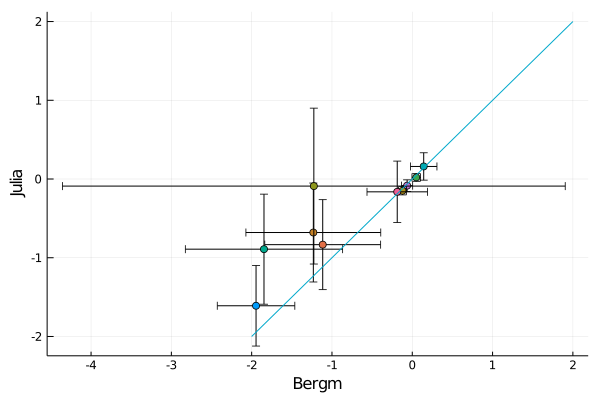

In [61]:
rs_cat = hcat(rs...)'
scatter(mean(brm2,dims=1),mean(rs_cat,dims=1),legend=false, xerror=std(brm2,dims=1),yerror=std(rs_cat,dims=1),
    xlabel="Bergm", ylabel="Julia")
plot!([-2,2],[-2,2])

## Compare posterior distributions

In [62]:
size(rs_cat)

(20000, 10)

In [63]:
size(brm2)

(20000, 10)

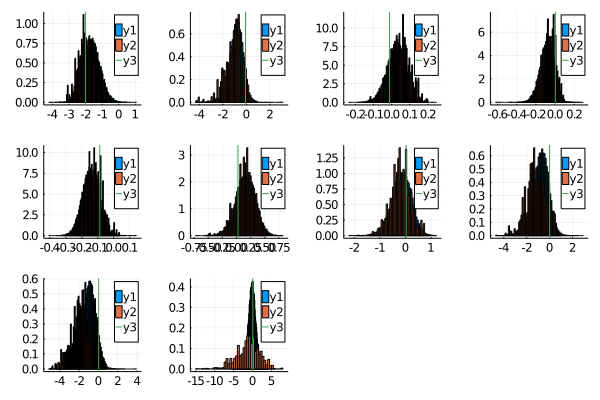

In [64]:
plot_ar = Any[]
for i in 1:10
    p = histogram(rs_cat[:,i], normed=true)
    p = histogram!(brm2[:,i], normed=true)
    p = vline!([params[i]])
#     p = plot!(Normal(0, 1), lw = 3)
    push!(plot_ar, p)
end
plot(plot_ar...)